# Final Project DESU
### DTI over the Corpus Callosum and Aging
#### Daniela M. Pinzon 
##### 2025


### **Step 0. Loading and organizing the dataframe**

In [33]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Upload files
tracto_path='/home/daniela/Documents/PROJECTS/DESU_Data_Science/PROJECT_DTI_AGE/Final_Tractometry'

listsub = ['01', '02', '03', '05', '06', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '19', '20', '21', '22', '23', '24', '25', '26',
             '27', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
             '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71']

# CREATE CSV allsub DTI FILE FOR GIVEN CC and metric
dti_metric_list=['FA']
#CCx_list=['CC_5']
CCx_list=['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']

for dti_metric in dti_metric_list:
    for CCx in CCx_list:
        list_CCx_val = []
        for subj in listsub:
            file_path = os.path.join(tracto_path, f'sub-{subj}_{dti_metric}_tractometry_mergedTOMs.csv')
            if os.path.exists(file_path):
                data_sub = pd.read_csv(file_path, sep=";")
                list_CCx_val.append(data_sub[CCx].values)
            else:
                print(f"File not found: {file_path}")

        # Convert list of arrays → DataFrame
        dfCCx = pd.DataFrame(list_CCx_val)

        # Rename columns seg_2, seg_3, ... up to length
        new_col_names = [f"seg_{i}" for i in range(2, 2 + dfCCx.shape[1])]
        dfCCx.columns = new_col_names

        # Save to CSV
        out_file = f"{CCx}_{dti_metric}.csv"
        dfCCx.to_csv(out_file, index_label="Index")

        print(f"Saved {out_file} with shape {dfCCx.shape}")

dfCCx.head()

Saved CC_1_FA.csv with shape (66, 98)
Saved CC_2_FA.csv with shape (66, 98)
Saved CC_3_FA.csv with shape (66, 98)
Saved CC_4_FA.csv with shape (66, 98)
Saved CC_5_FA.csv with shape (66, 98)
Saved CC_6_FA.csv with shape (66, 98)
Saved CC_7_FA.csv with shape (66, 98)


seg_2     seg_3     seg_4     seg_5     seg_6     seg_7     seg_8  \
0  0.217662  0.210098  0.247803  0.268852  0.290765  0.323112  0.343515   
1  0.253484  0.262070  0.292464  0.332066  0.363638  0.387894  0.380612   
2  0.260242  0.270165  0.298168  0.317146  0.341831  0.349599  0.360562   
3  0.284478  0.273726  0.305177  0.316505  0.333896  0.341914  0.340203   
4  0.299203  0.279968  0.325303  0.330661  0.334002  0.345579  0.356900   

      seg_9    seg_10    seg_11  ...    seg_90    seg_91    seg_92    seg_93  \
0  0.357370  0.369495  0.379671  ...  0.360924  0.332037  0.314768  0.299466   
1  0.380712  0.392777  0.405353  ...  0.406321  0.379443  0.356917  0.352207   
2  0.364213  0.387899  0.417723  ...  0.401845  0.398161  0.385322  0.370853   
3  0.352046  0.366992  0.396127  ...  0.406781  0.398832  0.383533  0.360845   
4  0.364836  0.374161  0.378739  ...  0.403711  0.402517  0.389317  0.374304   

     seg_94    seg_95    seg_96    seg_97    seg_98    seg_99  
0  0.298382  0.308184  0.298445  0.273005  0.262117  0.256813  
1  0.348463  0.339861  0.316460  0.295315  0.280481  0.261766  
2  0.351907  0.341978  0.327453  0.311015  0.270894  0.284198  
3  0.344475  0.325261  0.298865  0.274800  0.256411  0.242831  
4  0.378468  0.367895  0.331832  0.293978  0.256532  0.244655  

[5 rows x 98 columns]

### 1. Pre-processing of the demographic Information

In [34]:
# Install openpyxl if not already installed
#%pip install openpyxl --quiet

# Upload the demographic file
sub_id_file='/home/daniela/Documents/PROJECTS/DESU_Data_Science/PROJECT_DTI_AGE/sub_DWI_list.csv'
sub_id = pd.read_csv(sub_id_file, sep=";")
#sub_id.head()

In [35]:
from sklearn.preprocessing import OneHotEncoder

sub_id_df = sub_id
#One-hot encoding fo "group" variable = aging groups
category_column = sub_id_df[['group']]
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(category_column).toarray()
category_encoded_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['group']))
sub_id_df = pd.concat([sub_id_df, category_encoded_df], axis=1)

# Similar procedure for the "sex" variable
category_column = sub_id_df[['sex']]
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(category_column).toarray()
category_encoded_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['sex']))
sub_id_df = pd.concat([sub_id_df, category_encoded_df], axis=1)

# eliminate columns: "group", "sex" and "sub"
sub_id_df = sub_id_df.drop(columns=[ 'sex', 'sub'])
sub_id_df.head()

NEW_SUB  age group  group_M  group_O  group_Y  sex_F  sex_M
0  sub-01   25     Y      0.0      0.0      1.0    1.0    0.0
1  sub-02   27     Y      0.0      0.0      1.0    0.0    1.0
2  sub-03   28     Y      0.0      0.0      1.0    1.0    0.0
3  sub-05   21     Y      0.0      0.0      1.0    1.0    0.0
4  sub-06   25     Y      0.0      0.0      1.0    1.0    0.0

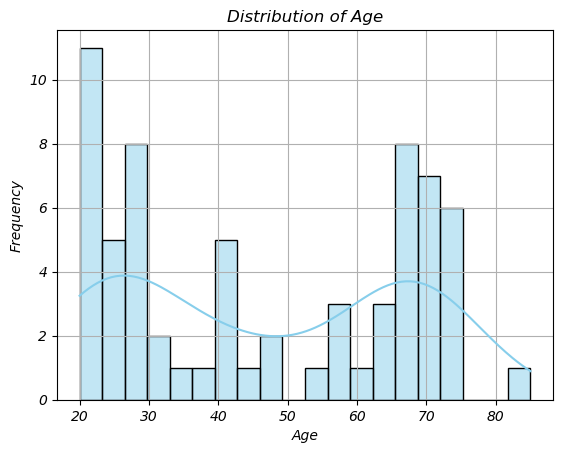

In [ ]:
age = sub_id_df['age'].dropna()

# Plot histogram with KDE (Kernel Density Estimate)
sns.histplot(age, kde=True, bins=20, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [36]:
# Merging dataframes --> maybe it is needed for Train - Test split
CC_path = '/home/daniela/Documents/PROJECTS/DESU_Data_Science/PROJECT_DTI_AGE/Notebook'
#CCx_list=['CC_4']

data_frames = []
for CCx in CCx_list:
    for dti_metric in dti_metric_list:
        print(f'Merging data for {CCx} and metric {dti_metric}')
        file_path = os.path.join(CC_path, f'{CCx}_FA.csv')
        
        CCx_df = pd.read_csv(file_path)
        data_frames = [sub_id_df, CCx_df]
        #save merged dataframe
        dfCCx = pd.concat(data_frames, axis=1)
        dfCCx.to_csv(CCx +'_'+dti_metric+'.csv', index=False)

Merging data for CC_1 and metric FA
Merging data for CC_2 and metric FA
Merging data for CC_3 and metric FA
Merging data for CC_4 and metric FA
Merging data for CC_5 and metric FA
Merging data for CC_6 and metric FA
Merging data for CC_7 and metric FA


### 2. Data Visualization 

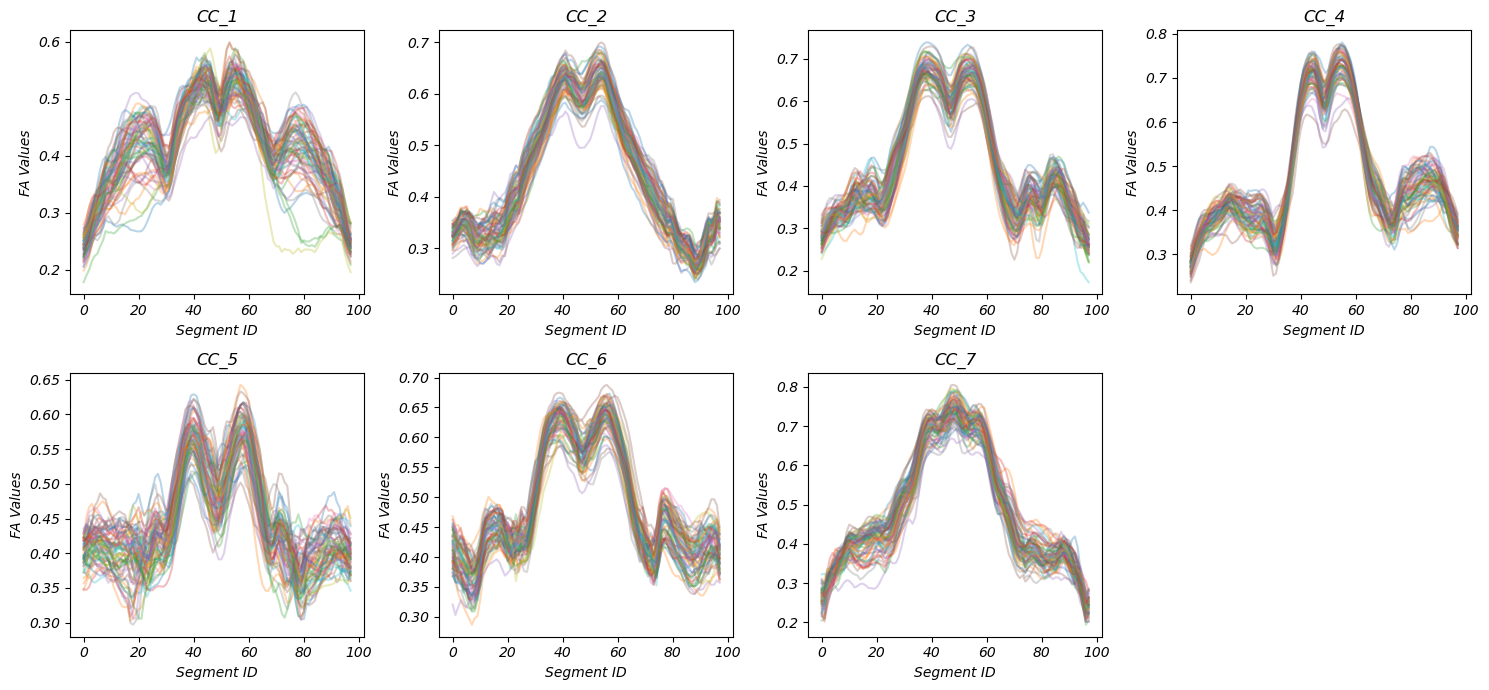

In [ ]:
# Paths and CC list
CC_path = '/home/daniela/Documents/PROJECTS/DESU_Data_Science/PROJECT_DTI_AGE/Notebook'
CCx_list = ['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']

# Create subplots (2x4 grid for 7 plots)
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for i, CCx in enumerate(CCx_list):
    file_path = os.path.join(CC_path, f'{CCx}_FA.csv')
    dfCCx = pd.read_csv(file_path, sep=",")

    # drop the columns that are not numeric : NEW_SUB	age	group	group_M	group_O	group_Y	sex_F	sex_M
    dfCCx = dfCCx.drop(['NEW_SUB', 'Index','age', 'group', 'group_M', 'group_O', 'group_Y', 'sex_F', 'sex_M'], axis=1)
    # Select only numeric columns
    feature_cols = dfCCx.select_dtypes(include=['float', 'int']).columns
    
    # X-axis: 98 nodes
    x = range(len(feature_cols))

    # Plot each row as a line
    for idx, row in dfCCx.iterrows():
        axs[i].plot(x, row[feature_cols].values, alpha=0.3)

    axs[i].set_title(f'{CCx}')
    axs[i].set_xlabel('Segment ID')
    axs[i].set_ylabel('FA Values')

# Remove unused subplot (8th slot)
for j in range(len(CCx_list), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


### 3. Pre-processing of the DTI data  ()

#### PLAN
**Reduce features** 
1. Robust Scaling 
2. Variance Threshold
3. Feature Selection

**Regression Models** -> age
1. Lasso
2. Ridge

**Classification Models** --> 3 groups
1. Nearest Neighbors


Prepocessing DTI data requires a esptial foccus on feature selection due to the amount of columns (98), against 66 rows 

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV, learning_curve
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, SelectFromModel
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline


exclude_cols = ['NEW_SUB', 'Index','group', 'group_M', 'group_O', 'group_Y', 'sex_F', 'sex_M']

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lasso coefs 
all_coefs={}
# best models saved
all_best_lasso = {}
all_best_ridge = {}
# Store selected features
selected_features_lasso = {}
selected_features_ridge = {}

# Loop over CCx datasets
CCx_list = ['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']

for CCx in CCx_list:
    file_path = os.path.join(CC_path, f'{CCx}_FA.csv')
    dfCCx = pd.read_csv(file_path)

    # Features
    X = dfCCx.drop(columns='age', errors="ignore")
    X = X.drop(columns=[c for c in exclude_cols if c in X.columns], errors="ignore")

    # Target
    y = sub_id_df['age'].dropna()

    # Features: Keep only rows with indices present in y
    X = X.loc[y.index].reset_index(drop=True)
    y = y.reset_index(drop=True)
    # Verify alignment
    assert len(X) == len(y), "X and y have different lengths after alignment!"
    assert X.index.equals(y.index), "Indices of X and y do not match!"
    print("Alignment confirmed. X shape:", X.shape, "y shape:", y.shape)

    # --------------------------
    # 1) LASSO pipeline
    # --------------------------
    pipe_lasso = Pipeline([
        ('scaler', RobustScaler()),
        ('feature_selection', 'passthrough'),
        ('regressor', Lasso(max_iter=10000))
    ])

    param_grid_lasso = [
        {
            'feature_selection': [VarianceThreshold()],
            'feature_selection__threshold': [0.01, 0.05, 0.08],
            'regressor__alpha': [0.01,0.1, 1.0, 10.0, 100]
        },
        {
            'feature_selection': [SelectKBest(score_func=f_regression)],
            'feature_selection__k': [5, 10, 15, 20],
            'regressor__alpha': [0.01,0.1, 1.0, 10.0, 100]
        },
        {
            'feature_selection': [SelectFromModel(LassoCV(max_iter=10000, random_state=42))],
            'feature_selection__max_features': [5, 10, 15, 20],
            'regressor__alpha': [0.01,0.1, 1.0, 10.0, 100]
        }
    ]

    grid_lasso = GridSearchCV(
        estimator=pipe_lasso,
        param_grid=param_grid_lasso,
        cv=cv.split(X, y),
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    grid_lasso.fit(X, y)

    print(f"\n===== {CCx} - LASSO =====")
    print("Best params:", grid_lasso.best_params_)
    print("Best CV R²:", grid_lasso.best_score_)

    # Get final Lasso model from the pipeline
    best_lasso = grid_lasso.best_estimator_
    all_best_lasso[CCx] = best_lasso

    # Get selected feature names after preprocessing + selection
    feature_selector = best_lasso.named_steps['feature_selection']

    if hasattr(feature_selector, 'get_support'):
        # For selectors like VarianceThreshold, SelectKBest, SelectFromModel
        mask = feature_selector.get_support()
        selected_features = X.columns[mask]
    else:
        # If no selection step ("passthrough")
        selected_features = X.columns
    
    # Save selected features externally
    selected_features_lasso[CCx] = list(selected_features)

    # Get coefficients
    lasso_coef = best_lasso.named_steps['regressor'].coef_
    # Build dataframe of coefficients
    coef_df = pd.DataFrame({
        "Feature": selected_features,
        "Coefficient": lasso_coef
    }).sort_values(by="Coefficient", ascending=False)
    print("Intercept:", best_lasso.named_steps['regressor'].intercept_)
    #print(coef_df.head(10))  # top 10 features
    all_coefs[CCx]=coef_df


    # --------------------------
    # 2) RIDGE pipeline
    # --------------------------
    pipe_ridge = Pipeline([
        ('scaler', RobustScaler()),
        ('feature_selection', 'passthrough'),
        ('regressor', Ridge(max_iter=10000))
    ])

    param_grid_ridge = [
        {
            'feature_selection': [VarianceThreshold()],
            'feature_selection__threshold': [0.01, 0.05, 0.08],
            'regressor__alpha': [0.01,0.1, 1.0, 10.0, 100]
        },
        {
            'feature_selection': [SelectKBest(score_func=f_regression)],
            'feature_selection__k': [5, 10, 15, 20],
            'regressor__alpha': [0.01,0.1, 1.0, 10.0, 100]
        },
        {
            'feature_selection': [SelectFromModel(RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100], store_cv_values=True))],            
            'feature_selection__max_features': [5, 10, 15, 20],
            'regressor__alpha': [0.01,0.1, 1.0, 10.0, 100]
        }
    ]

    grid_ridge = GridSearchCV(
        estimator=pipe_ridge,
        param_grid=param_grid_ridge,
        cv=cv.split(X, y),
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    grid_ridge.fit(X, y)
    best_ridge = grid_ridge.best_estimator_
    all_best_ridge[CCx] = best_ridge

    print(f"\n===== {CCx} - RIDGE =====")
    print("Best params:", grid_ridge.best_params_)
    print("Best CV R²:", grid_ridge.best_score_)

    feature_selector_ridge = best_ridge.named_steps['feature_selection']
    if hasattr(feature_selector_ridge, 'get_support'):
        mask_ridge = feature_selector_ridge.get_support()
        selected_features_r = X.columns[mask_ridge]
    else:
        selected_features_r = X.columns

    # Save selected features externally
    selected_features_ridge[CCx] = list(selected_features_r)

    # --------------------------
    # Comparing the 2 models
    # --------------------------

    # comparing R2 scores
    if grid_lasso.best_score_ > grid_ridge.best_score_:
        print(f" RESULTS on R2 :  For {CCx}, LASSO performed better.")
    else:
        print(f" RESULTS on R2: For {CCx}, RIDGE performed better.")


Alignment confirmed. X shape: (66, 98) y shape: (66,)
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.603e+00, tolerance: 2.127e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.930e+01, tolerance: 2.229e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu


===== CC_1 - LASSO =====
Best params: {'feature_selection': SelectFromModel(estimator=LassoCV(max_iter=10000, random_state=42)), 'feature_selection__max_features': 5, 'regressor__alpha': 1.0}
Best CV R²: 0.4376816409436691
Intercept: 46.6245070648568
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/


===== CC_1 - RIDGE =====
Best params: {'feature_selection': SelectKBest(score_func=<function f_regression at 0x7d944c122700>), 'feature_selection__k': 10, 'regressor__alpha': 10.0}
Best CV R²: 0.4206564011070875
 RESULTS on R2 :  For CC_1, LASSO performed better.
Alignment confirmed. X shape: (66, 98) y shape: (66,)
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.389e+00, tolerance: 2.127e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.419e+01, tolerance: 2.074e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu


===== CC_2 - LASSO =====
Best params: {'feature_selection': SelectKBest(score_func=<function f_regression at 0x7d944c122700>), 'feature_selection__k': 20, 'regressor__alpha': 1.0}
Best CV R²: 0.37270273788740027
Intercept: 46.35440739253409
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/


===== CC_2 - RIDGE =====
Best params: {'feature_selection': VarianceThreshold(), 'feature_selection__threshold': 0.01, 'regressor__alpha': 100}
Best CV R²: 0.41298952741622513
 RESULTS on R2: For CC_2, RIDGE performed better.
Alignment confirmed. X shape: (66, 98) y shape: (66,)
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.280e+00, tolerance: 2.229e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.661e+01, tolerance: 2.074e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu


===== CC_3 - LASSO =====
Best params: {'feature_selection': SelectKBest(score_func=<function f_regression at 0x7d944c122700>), 'feature_selection__k': 20, 'regressor__alpha': 1.0}
Best CV R²: 0.30569000674740715
Intercept: 47.57105340891277
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/


===== CC_3 - RIDGE =====
Best params: {'feature_selection': SelectKBest(score_func=<function f_regression at 0x7d944c122700>), 'feature_selection__k': 20, 'regressor__alpha': 10.0}
Best CV R²: 0.2996314255407625
 RESULTS on R2 :  For CC_3, LASSO performed better.
Alignment confirmed. X shape: (66, 98) y shape: (66,)
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+01, tolerance: 2.127e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.647e+00, tolerance: 2.229e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu


===== CC_4 - LASSO =====
Best params: {'feature_selection': SelectFromModel(estimator=LassoCV(max_iter=10000, random_state=42)), 'feature_selection__max_features': 10, 'regressor__alpha': 1.0}
Best CV R²: 0.3549662488090176
Intercept: 46.20996464509609
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/


===== CC_4 - RIDGE =====
Best params: {'feature_selection': SelectFromModel(estimator=RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100],
                                  store_cv_values=True)), 'feature_selection__max_features': 20, 'regressor__alpha': 10.0}
Best CV R²: 0.39262362877679974
 RESULTS on R2: For CC_4, RIDGE performed better.
Alignment confirmed. X shape: (66, 98) y shape: (66,)
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+01, tolerance: 2.229e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+01, tolerance: 2.307e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu


===== CC_5 - LASSO =====
Best params: {'feature_selection': SelectFromModel(estimator=LassoCV(max_iter=10000, random_state=42)), 'feature_selection__max_features': 5, 'regressor__alpha': 0.01}
Best CV R²: 0.4066886244841202
Intercept: 45.25465499148202
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/


===== CC_5 - RIDGE =====
Best params: {'feature_selection': SelectFromModel(estimator=RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100],
                                  store_cv_values=True)), 'feature_selection__max_features': 10, 'regressor__alpha': 10.0}
Best CV R²: 0.40204535779842
 RESULTS on R2 :  For CC_5, LASSO performed better.
Alignment confirmed. X shape: (66, 98) y shape: (66,)
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.822e+01, tolerance: 2.074e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.037e+00, tolerance: 2.127e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu


===== CC_6 - LASSO =====
Best params: {'feature_selection': VarianceThreshold(), 'feature_selection__threshold': 0.01, 'regressor__alpha': 1.0}
Best CV R²: 0.4125867659350525
Intercept: 45.7031047579571
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/


===== CC_6 - RIDGE =====
Best params: {'feature_selection': VarianceThreshold(), 'feature_selection__threshold': 0.01, 'regressor__alpha': 100}
Best CV R²: 0.45837143628002347
 RESULTS on R2: For CC_6, RIDGE performed better.
Alignment confirmed. X shape: (66, 98) y shape: (66,)
Fitting 5 folds for each of 55 candidates, totalling 275 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.440e+00, tolerance: 2.127e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.440e+00, tolerance: 2.127e+00
  model = cd_fast.enet_coordinate_descent(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu


===== CC_7 - LASSO =====
Best params: {'feature_selection': VarianceThreshold(), 'feature_selection__threshold': 0.01, 'regressor__alpha': 1.0}
Best CV R²: 0.12733561044589986
Intercept: 46.717809062338944
Fitting 5 folds for each of 55 candidates, totalling 275 fits

===== CC_7 - RIDGE =====
Best params: {'feature_selection': SelectFromModel(estimator=RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100],
                                  store_cv_values=True)), 'feature_selection__max_features': 20, 'regressor__alpha': 100}
Best CV R²: 0.14671647904027457
 RESULTS on R2: For CC_7, RIDGE performed better.


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/

Exception ignored in: <function ResourceTracker.__del__ at 0x7af58169f2e0>
Traceback (most recent call last):
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x76495d49b2e0>
Traceback (most recent call last):
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
Chi

In [76]:
def adjusted_r2(r2, n_samples, n_features):
    """Calculate adjusted R²."""
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

# Loop over CCx datasets
for CCx in CCx_list:
    #  Lasso
    n_samples = len(y)
    n_features_lasso = len(selected_features_lasso[CCx])
    r2_lasso = grid_lasso.best_score_
    adj_r2_lasso = adjusted_r2(r2_lasso, n_samples, n_features_lasso)

    # Ridge
    n_features_ridge = len(selected_features_ridge[CCx])
    r2_ridge = grid_ridge.best_score_
    adj_r2_ridge = adjusted_r2(r2_ridge, n_samples, n_features_ridge)

    # Print results
    print(f"\n===== {CCx} - Adjusted R² =====")
    print(f"LASSO Adjusted R²: {adj_r2_lasso:.4f} (Features: {n_features_lasso})")
    print(f"RIDGE Adjusted R²: {adj_r2_ridge:.4f} (Features: {n_features_ridge})")

    # Compare models
    if adj_r2_lasso > adj_r2_ridge:
        print(f"For {CCx}, LASSO performed better (Adjusted R²).")
    else:
        print(f"For {CCx}, RIDGE performed better (Adjusted R²).")



===== CC_1 - Adjusted R² =====
LASSO Adjusted R²: 0.0701 (Features: 4)
RIDGE Adjusted R²: -0.0084 (Features: 10)
For CC_1, LASSO performed better (Adjusted R²).

===== CC_2 - Adjusted R² =====
LASSO Adjusted R²: -0.2605 (Features: 20)
RIDGE Adjusted R²: 2.6807 (Features: 98)
For CC_2, RIDGE performed better (Adjusted R²).

===== CC_3 - Adjusted R² =====
LASSO Adjusted R²: -0.2605 (Features: 20)
RIDGE Adjusted R²: -0.2325 (Features: 20)
For CC_3, RIDGE performed better (Adjusted R²).

===== CC_4 - Adjusted R² =====
LASSO Adjusted R²: -0.0313 (Features: 10)
RIDGE Adjusted R²: -0.2325 (Features: 20)
For CC_4, LASSO performed better (Adjusted R²).

===== CC_5 - Adjusted R² =====
LASSO Adjusted R²: 0.0546 (Features: 5)
RIDGE Adjusted R²: -0.0084 (Features: 10)
For CC_5, LASSO performed better (Adjusted R²).

===== CC_6 - Adjusted R² =====
LASSO Adjusted R²: 2.7189 (Features: 98)
RIDGE Adjusted R²: 2.6807 (Features: 98)
For CC_6, LASSO performed better (Adjusted R²).

===== CC_7 - Adjusted 

Exception ignored in: <function ResourceTracker.__del__ at 0x748c9189f2e0>
Traceback (most recent call last):
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x77bd73a9b2e0>
Traceback (most recent call last):
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
Chi

In [ ]:
## Printing the coefficients from Lasso Model 

# Loop through all
for cc, df in all_coefs.items():
    print(f"\n=== {cc} ===")
    print(df.head(10))



=== CC_1 ===
  Feature  Coefficient
3  seg_84    -0.483008
1  seg_35    -1.711717
2  seg_54    -4.910886
0  seg_15   -10.922194

=== CC_2 ===
   Feature  Coefficient
0   seg_11    -0.000000
2   seg_13    -0.000000
6   seg_64    -0.000000
7   seg_65    -0.000000
17  seg_84    -0.000000
15  seg_77    -0.000000
9   seg_70    -0.000000
8   seg_69    -0.000000
10  seg_71    -0.000000
14  seg_75    -0.000000
13  seg_74    -0.000000
12  seg_73    -0.000000
3   seg_14    -0.408134
11  seg_72    -1.218277
4   seg_28    -1.260257
16  seg_83    -2.635503
18  seg_85    -2.770947
5   seg_30    -3.758143
1   seg_12    -4.535821
19  seg_90    -4.821344

=== CC_3 ===
   Feature  Coefficient
1   seg_16    -0.000000
2   seg_17    -0.000000
3   seg_24    -0.000000
7   seg_41    -0.000000
16  seg_67    -0.000000
6   seg_27    -0.000000
9   seg_43    -0.000000
8   seg_42    -0.000000
11  seg_45    -0.000000
14  seg_54    -0.000000
13  seg_53    -0.000000
12  seg_52    -0.000000
19  seg_70    -0.000000
18 

In [84]:
all_best_lasso['CC_6']

Pipeline(steps=[('scaler', RobustScaler()),
                ('feature_selection', VarianceThreshold(threshold=0.01)),
                ('regressor', Lasso(max_iter=10000))])

/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+00, tol

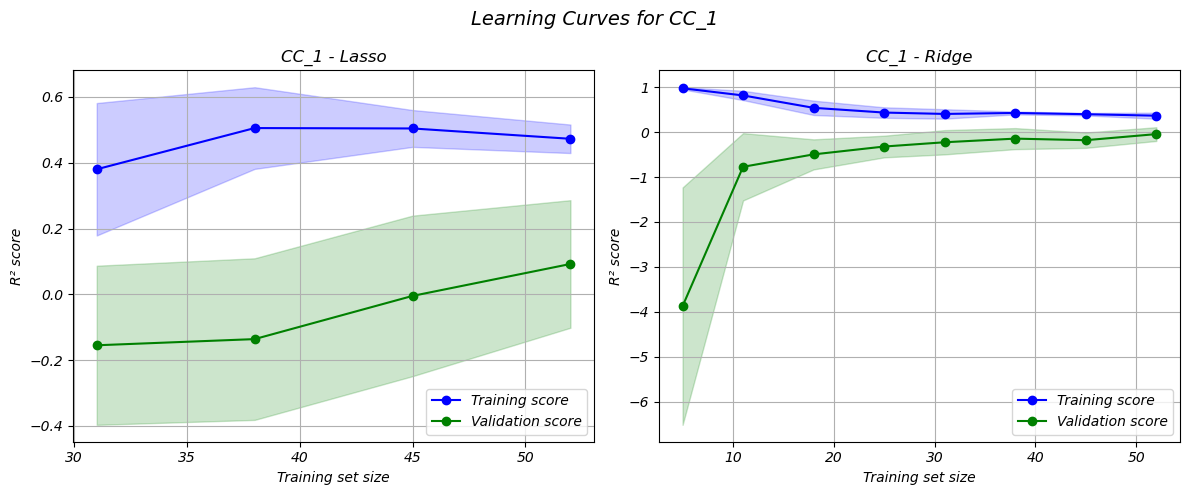

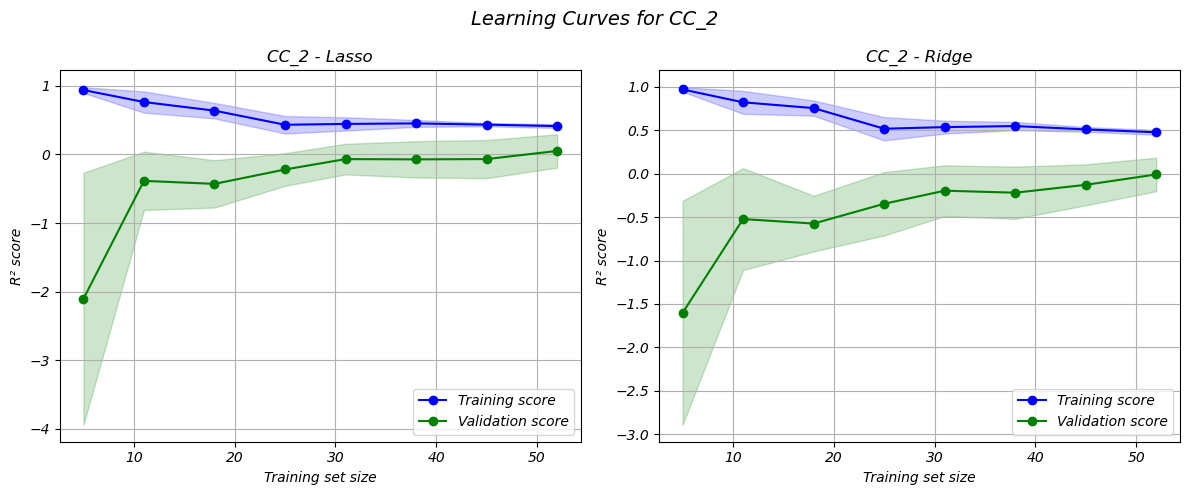

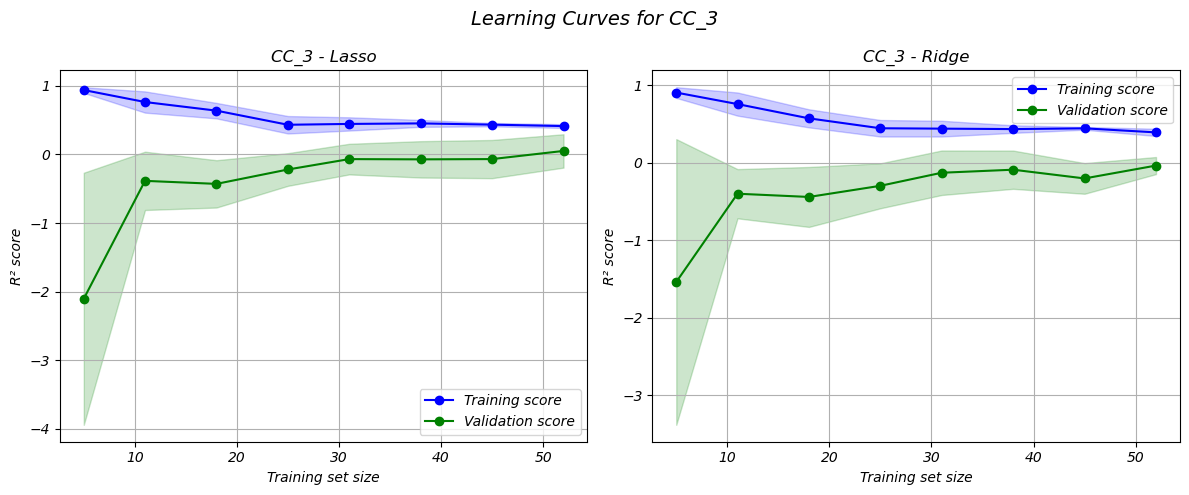

/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+00, tol

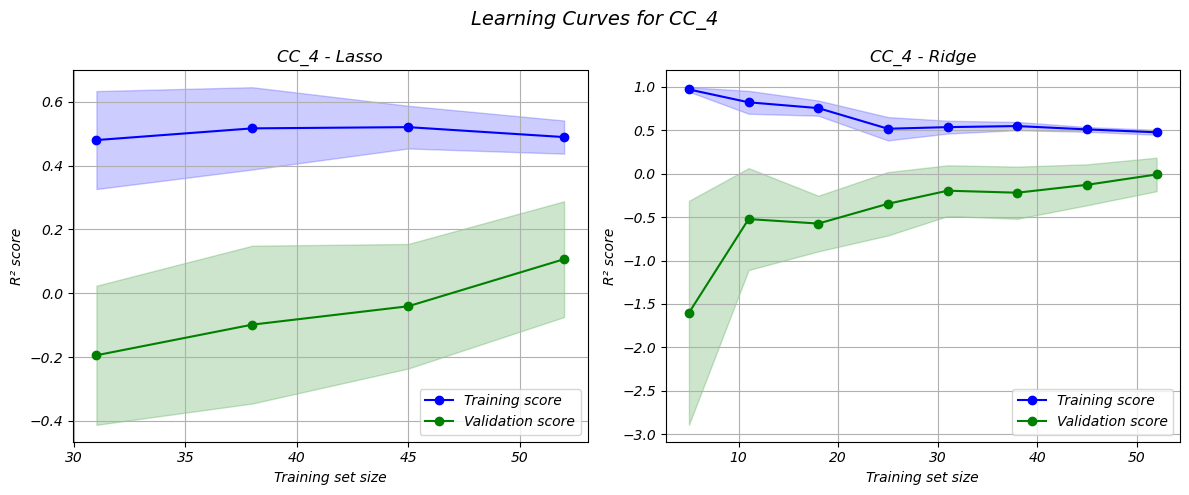

/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/feature_sele

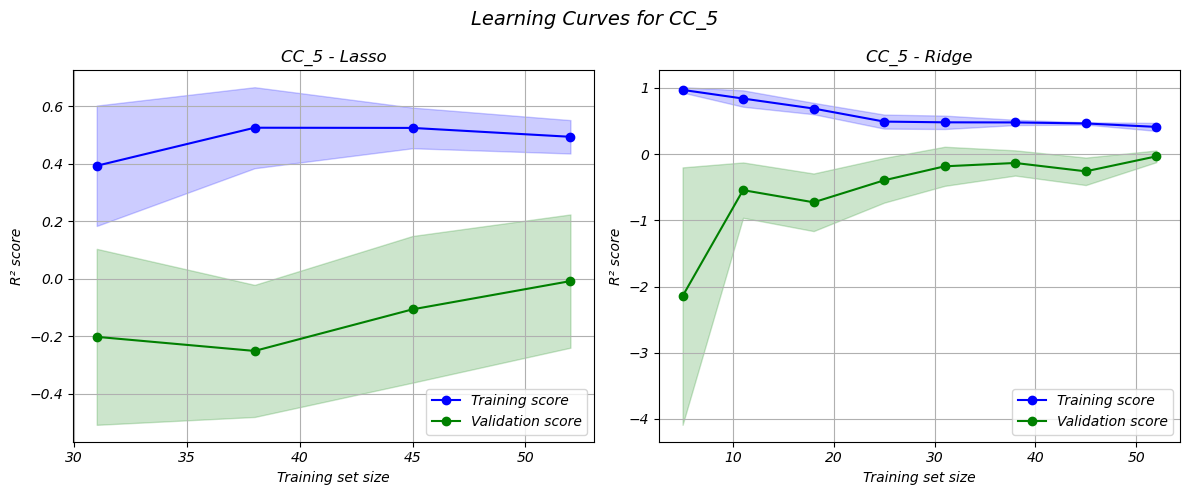

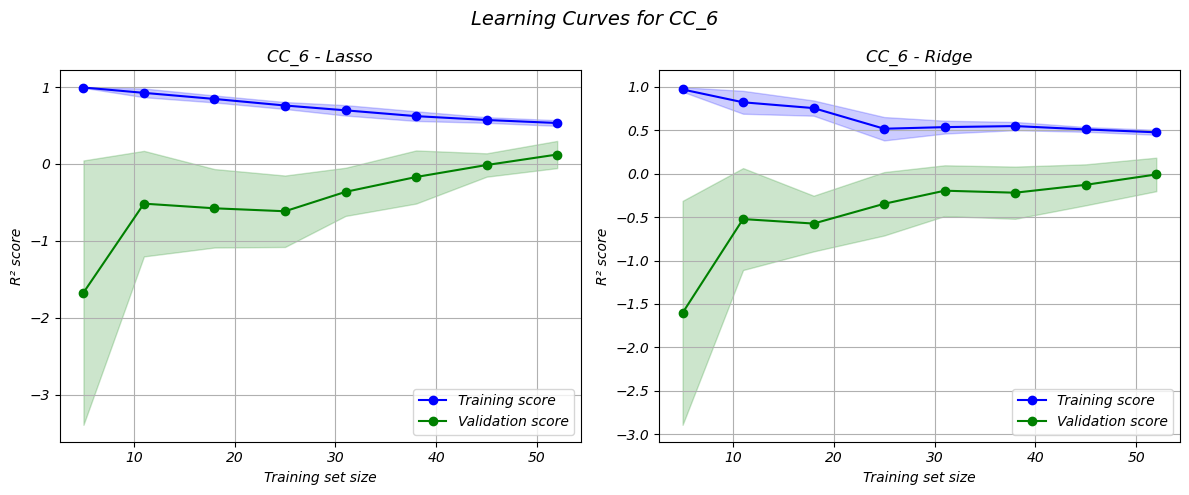

/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/daniela/anaconda3/

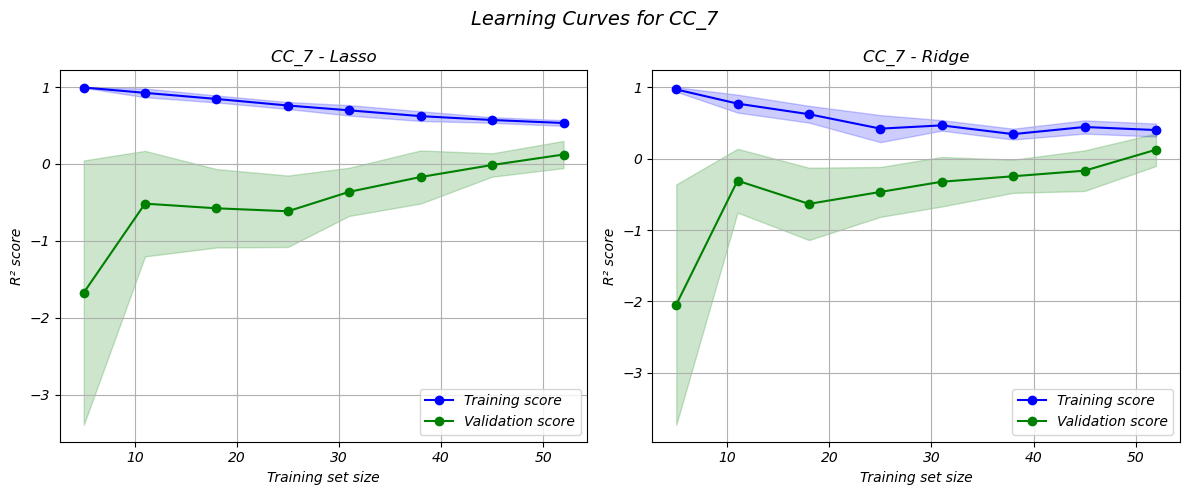

In [63]:
def plot_learning_curve(estimator, X, y, cv, title):
    """
    Plots learning curve for a given estimator and dataset.

    Parameters:
    - estimator : any sklearn estimator (pipeline, regressor, etc.)
    - X : feature matrix
    - y : target vector
    - cv : cross-validation strategy
    - title : plot title
    """
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, val_scores = learning_curve(
        estimator,
        X, y,
        cv=cv,
        scoring="r2",
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 8),
        shuffle=True,
        random_state=42
    )
    
    train_mean, train_std = train_scores.mean(axis=1), train_scores.std(axis=1)
    val_mean, val_std = val_scores.mean(axis=1), val_scores.std(axis=1)


    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")
    plt.plot(train_sizes, val_mean, 'o-', color="green", label="Validation score")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="green")
    # same axis for all plots
    #plt.xlim(10, 50)  # Fix x-axis
    #plt.ylim(-0.4, 1)  # Fix y-axis
    plt.title(title)
    plt.xlabel("Training set size")
    plt.ylabel("R² score")
    plt.legend(loc="best")
    plt.grid(True)



# Use of the function
for CCx in CCx_list:
    # for Lasso
    best_lasso = all_best_lasso[CCx]
    # for Ridge
    best_ridge = all_best_ridge[CCx]

    # Plot learning curves side by side
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_learning_curve(best_lasso, X, y, cv=cv, title=f"{CCx} - Lasso")
    plt.subplot(1,2,2)
    plot_learning_curve(best_ridge, X, y, cv=cv, title=f"{CCx} - Ridge")
    plt.suptitle(f"Learning Curves for {CCx}", fontsize=14)
    plt.tight_layout()
    plt.show()


In [42]:
print("\n=== Selected Lasso Features ===")
for ccx, feats in selected_features_lasso.items():
    print(f"{ccx}: {feats}")
    
print("\n=== Selected Ridge Features ===")
for ccx, feats in selected_features_ridge.items():
    print(f"{ccx}: {feats}")


=== Selected Lasso Features ===
CC_1: ['seg_15', 'seg_35', 'seg_54', 'seg_84']
CC_2: ['seg_11', 'seg_12', 'seg_13', 'seg_14', 'seg_28', 'seg_30', 'seg_64', 'seg_65', 'seg_69', 'seg_70', 'seg_71', 'seg_72', 'seg_73', 'seg_74', 'seg_75', 'seg_77', 'seg_83', 'seg_84', 'seg_85', 'seg_90']
CC_3: ['seg_15', 'seg_16', 'seg_17', 'seg_24', 'seg_25', 'seg_26', 'seg_27', 'seg_41', 'seg_42', 'seg_43', 'seg_44', 'seg_45', 'seg_52', 'seg_53', 'seg_54', 'seg_55', 'seg_67', 'seg_68', 'seg_69', 'seg_70']
CC_4: ['seg_9', 'seg_39', 'seg_40', 'seg_46', 'seg_71', 'seg_76', 'seg_79', 'seg_88', 'seg_89', 'seg_98']
CC_5: ['seg_10', 'seg_33', 'seg_49', 'seg_75', 'seg_80']
CC_6: ['seg_2', 'seg_3', 'seg_4', 'seg_5', 'seg_6', 'seg_7', 'seg_8', 'seg_9', 'seg_10', 'seg_11', 'seg_12', 'seg_13', 'seg_14', 'seg_15', 'seg_16', 'seg_17', 'seg_18', 'seg_19', 'seg_20', 'seg_21', 'seg_22', 'seg_23', 'seg_24', 'seg_25', 'seg_26', 'seg_27', 'seg_28', 'seg_29', 'seg_30', 'seg_31', 'seg_32', 'seg_33', 'seg_34', 'seg_35', 'seg

#### Shap -- LASSO

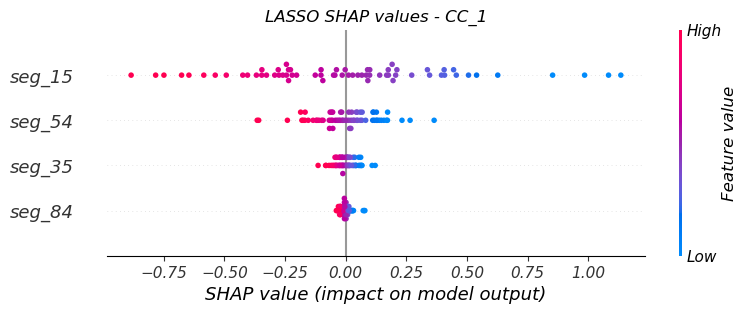

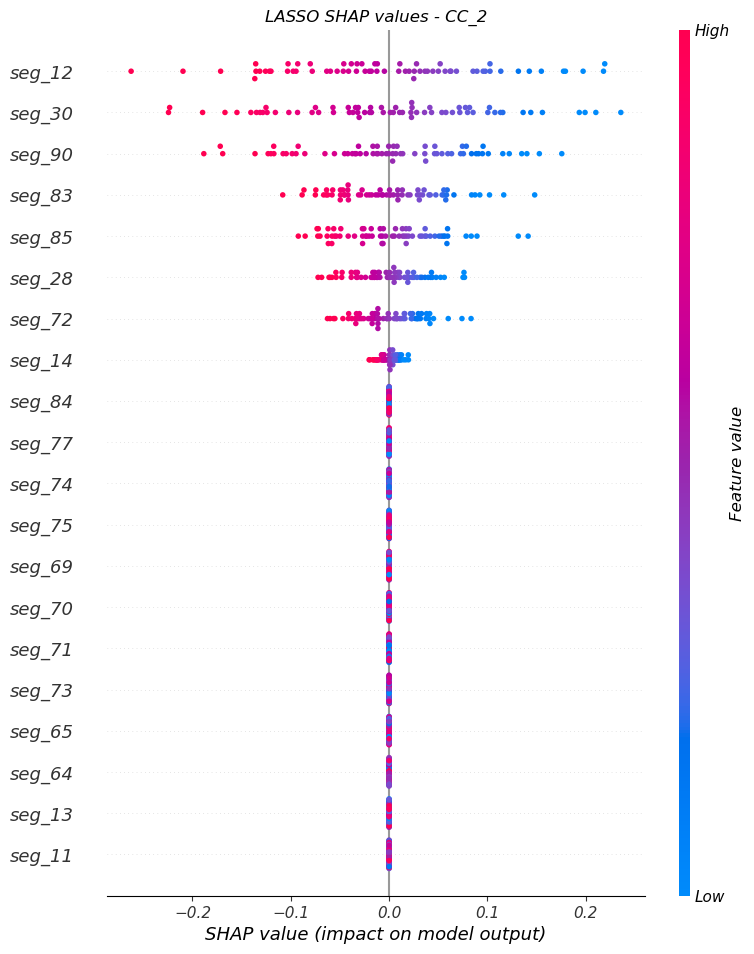

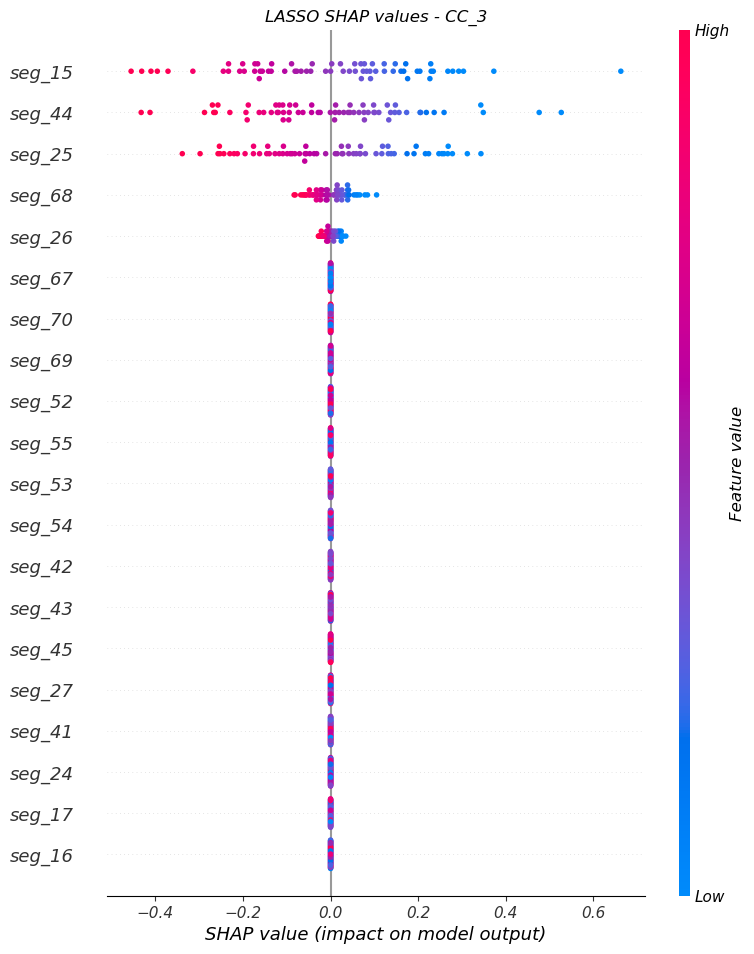

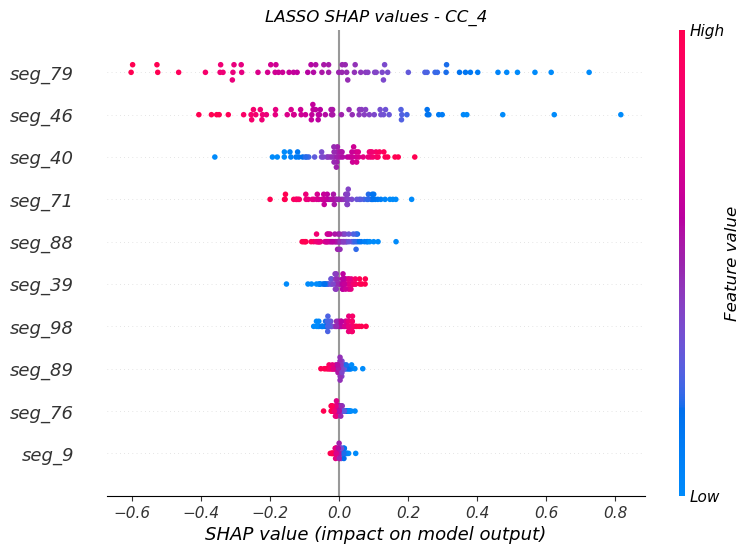

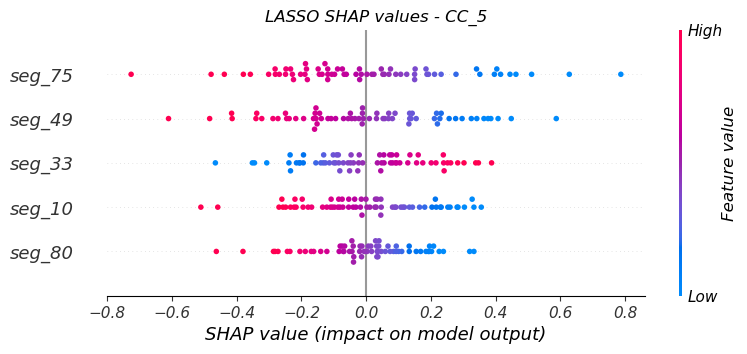

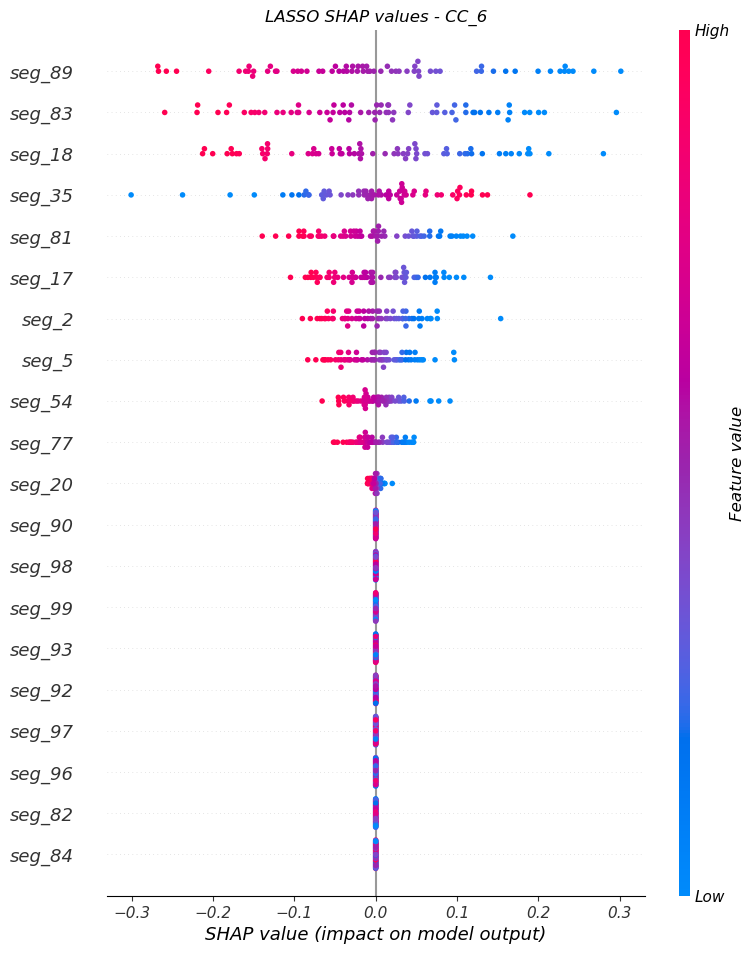

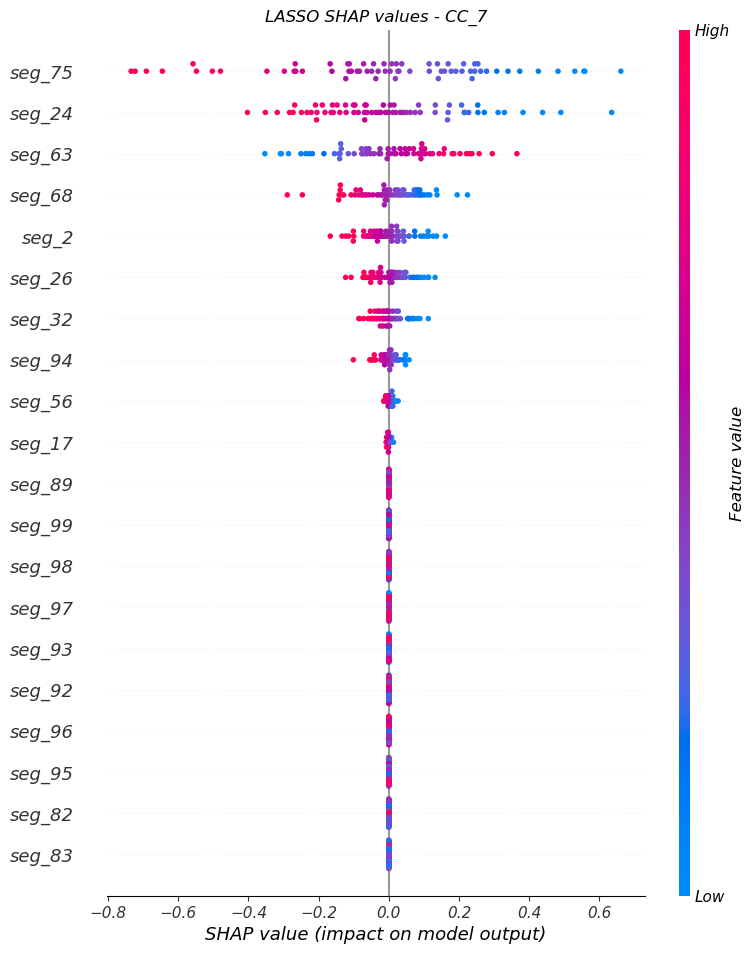

In [43]:
import shap

shap_values_lasso = {}
shap_values_ridge = {}



for CCx in CCx_list:
    # Reload dataset
    file_path = os.path.join(CC_path, f'{CCx}_FA.csv')
    dfCCx = pd.read_csv(file_path)

    # Features
    X = dfCCx.drop(columns='age', errors="ignore")
    X = X.drop(columns=[c for c in exclude_cols if c in X.columns], errors="ignore")

    # Target (same logic as before)
    y = sub_id_df['age'].dropna()
    X = X.loc[y.index].reset_index(drop=True)
    y = y.reset_index(drop=True)

    # ----------------------
    # LASSO SHAP
    # ----------------------
    selected_feats = selected_features_lasso[CCx]  # list of selected features
    best_lasso = all_best_lasso[CCx]

    # Subset X to selected features
    X_selected = X[selected_feats]

    # Get trained Lasso and scaler
    lasso_reg = best_lasso.named_steps['regressor']
    scaler = best_lasso.named_steps['scaler']

    # Transform the selected features
    #X_scaled = scaler.transform(X_selected)
    X_scaled = X_selected

    # SHAP explainer
    explainer_lasso = shap.Explainer(lasso_reg, X_scaled, feature_names=selected_feats)
    shap_vals_lasso = explainer_lasso(X_scaled)

    shap_values_lasso[CCx] = shap_vals_lasso

    # Visualization
    shap.summary_plot(shap_vals_lasso, X_scaled, feature_names=selected_feats, show=False)
    plt.title(f"LASSO SHAP values - {CCx}")
    plt.show()


In [44]:
def compute_and_plot_shap(
    CCx_list,
    CC_path,
    all_best_model,
    selected_features_model,
    sub_id_df,
    model_name='model',
    exclude_cols=None,
    target_col="age",
    figsize=(20, 10)
):
    
    import shap
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import os

    """
     SHAP values and plot per-CC bar charts.

    Parameters
    ----------
    CCx_list : list of str -  List of CC regions to process (e.g., ['CC_1', 'CC_2', ...]).
    CC_path : str -         Path to directory containing CCx CSV files.
    all_best_model :        Dictionary of trained best LASSO models {CCx: pipeline}.
    selected_features_model :   Dictionary of selected features {CCx: list of feature names}.
    sub_id_df :  DataFrame with target variable (must contain target_col).
    exclude_cols : list of str, optional  Columns to drop from input data.
    target_col : str, default="age"     Name of the target column.
    figsize : tuple, default=(20, 10) - >    Figure size for subplot grid.

    Returns :  all_shap_df : Dictionary of DataFrames with non-zero SHAP values per CC.
    """

    if exclude_cols is None:
        exclude_cols = []

    all_shap_df = {}

    # Prepare figure (2 rows × 4 cols for up to 8 CCs)
    n = len(CCx_list)
    ncols = 4
    nrows = int(np.ceil(n / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()

    for i, CCx in enumerate(CCx_list):
        # Reload dataset
        file_path = os.path.join(CC_path, f'{CCx}_FA.csv')
        dfCCx = pd.read_csv(file_path)

        # Features
        X = dfCCx.drop(columns=target_col, errors="ignore")
        X = X.drop(columns=[c for c in exclude_cols if c in X.columns], errors="ignore")

        # Target
        y = sub_id_df[target_col].dropna()
        X = X.loc[y.index].reset_index(drop=True)
        y = y.reset_index(drop=True)

        # ------------------------
        # Get model + features
        # ------------------------
        best_model = all_best_model[CCx]
        selected_feats = selected_features_model[CCx]
        X_selected = X[selected_feats]

        # Get trained regressor
        reg_model = best_model.named_steps['regressor']
        X_scaled = X_selected  # already scaled in pipeline

        # ------------------------
        # Compute SHAP values
        # ------------------------
        explainer = shap.LinearExplainer(reg_model, X_scaled, feature_perturbation="interventional")
        shap_values = explainer(X_scaled)

        # Mean absolute SHAP per feature
        mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

        shap_df = pd.DataFrame({
            'feature': selected_feats,
            'mean_abs_shap': mean_abs_shap
        }).sort_values(by='mean_abs_shap', ascending=True)

        # ------------------------
        # Plot horizontal bar chart
        # ------------------------
        ax = axs[i]
        ax.barh(shap_df['feature'], shap_df['mean_abs_shap'], color='skyblue')
        ax.set_title(f' {model_name} SHAP: {CCx}')
        ax.set_xlabel('Mean |SHAP value|')

        # Save results without zero values
        shap_df = shap_df[shap_df['mean_abs_shap'] > 0].reset_index(drop=True)
        all_shap_df[CCx] = shap_df

    # Hide unused subplots
    for j in range(len(CCx_list), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

    return all_shap_df


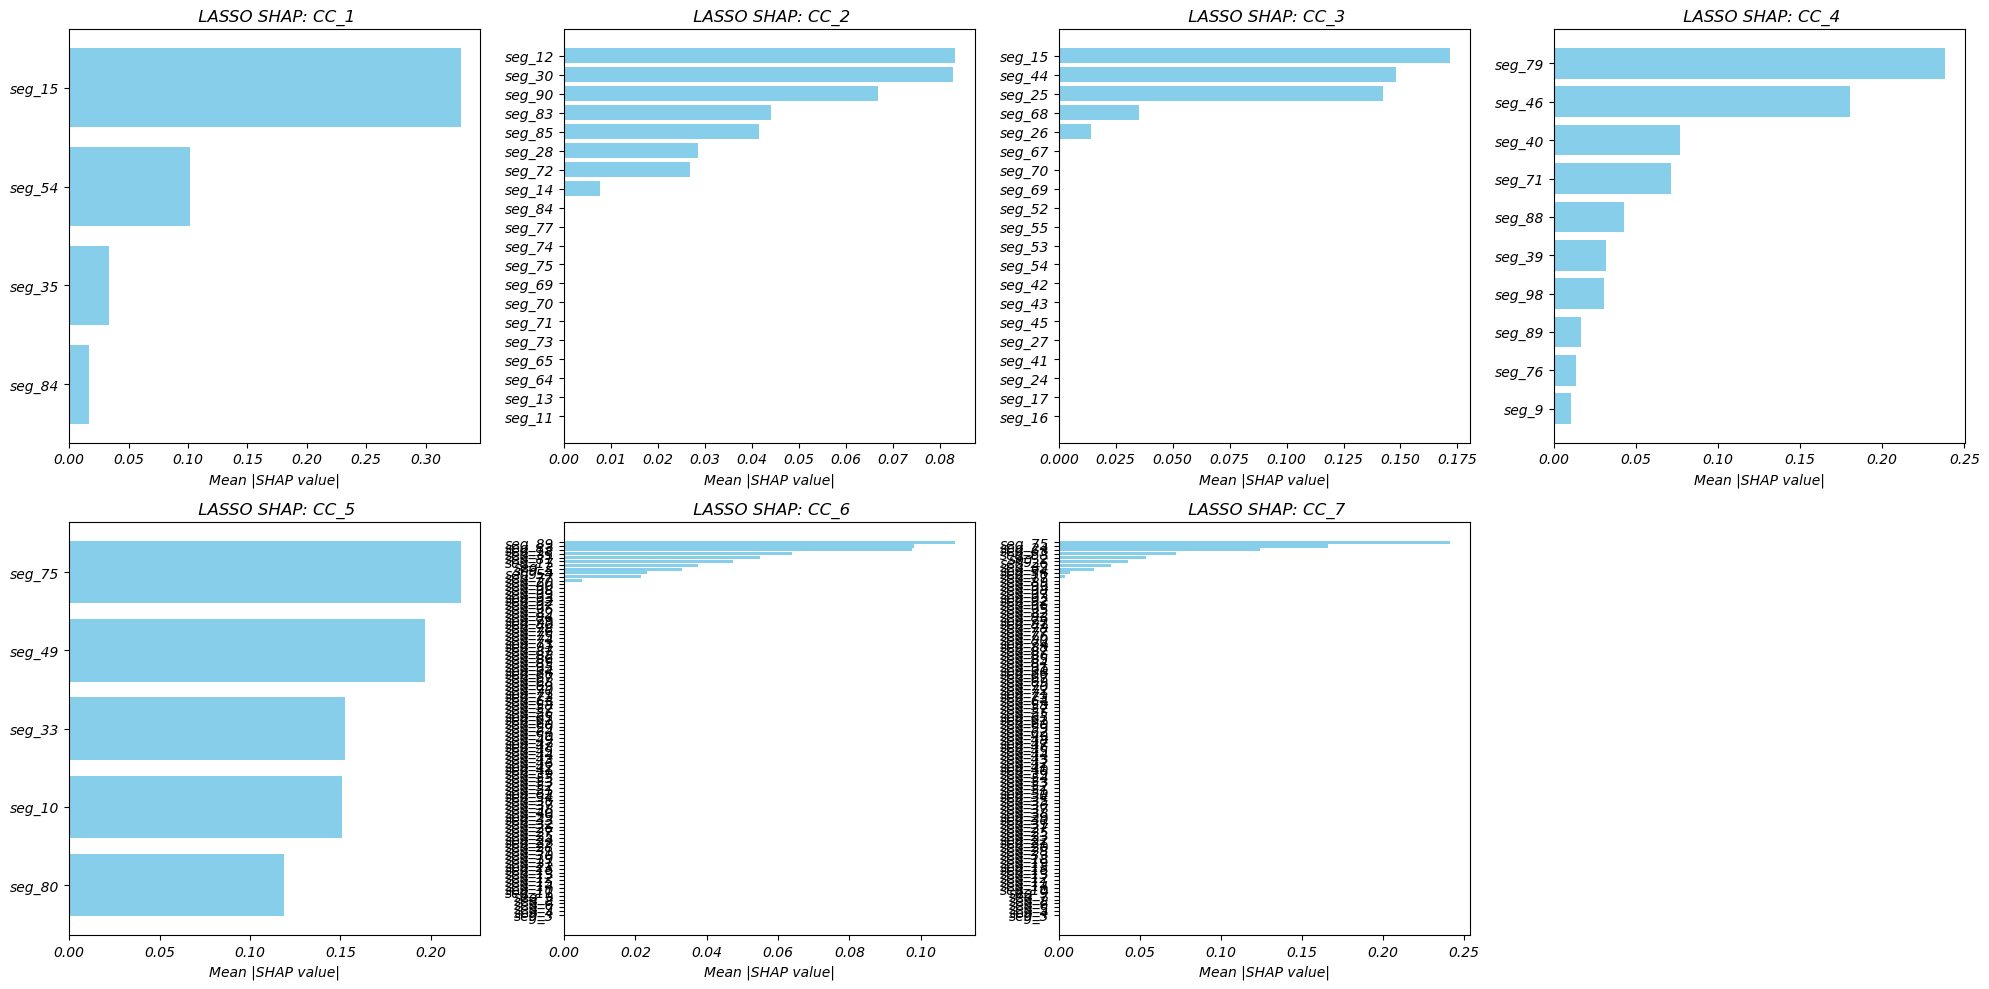

In [45]:
all_shap_df = compute_and_plot_shap(
    CCx_list=CCx_list,
    CC_path=CC_path,
    all_best_model=all_best_lasso,
    selected_features_model=selected_features_lasso,
    sub_id_df=sub_id_df,
    model_name='LASSO',
    exclude_cols=exclude_cols,
    target_col="age"
)

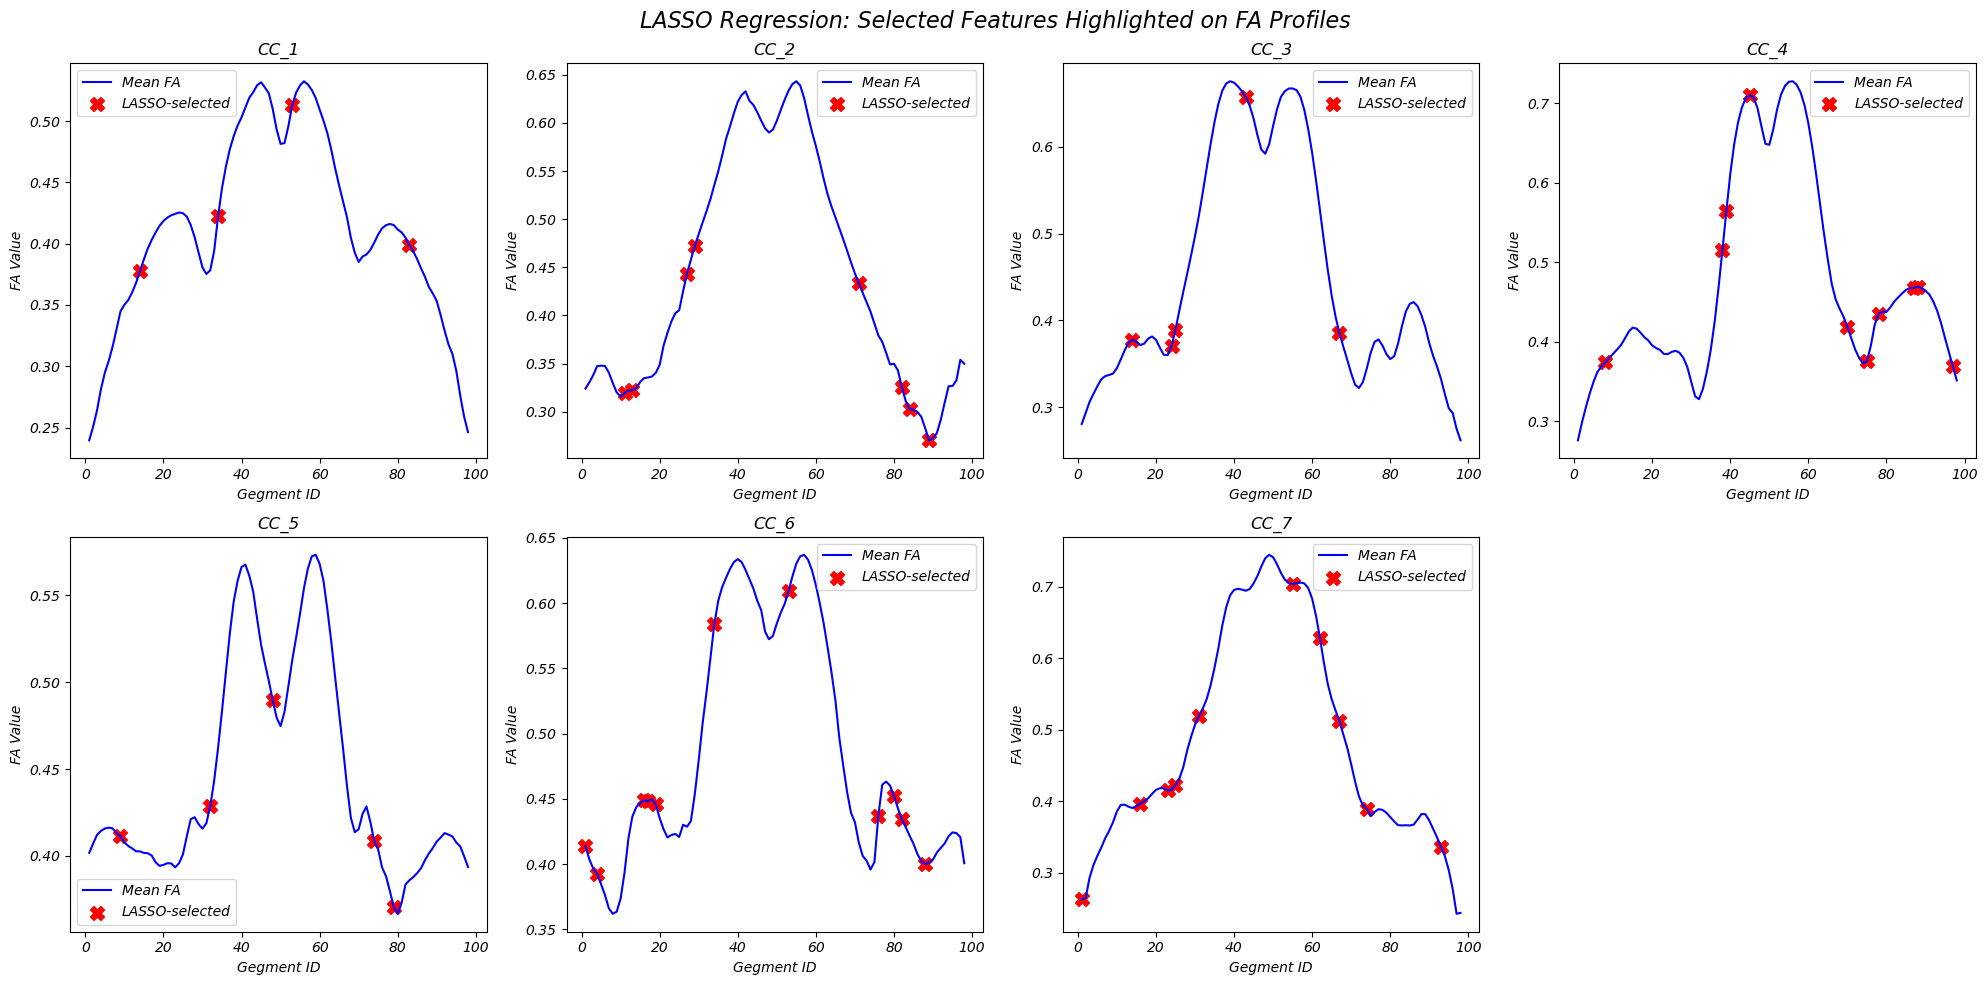

In [46]:
# Preload all CSVs
all_CCs = {CCx: pd.read_csv(os.path.join(CC_path, f"{CCx}_FA.csv"), sep=",") for CCx in CCx_list}

import matplotlib.pyplot as plt


# Create figure with 2 rows x 4 columns
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

exclude_cols = ['NEW_SUB', 'age','Index','group', 'group_M', 'group_O', 'group_Y', 'sex_F', 'sex_M']


for i, CCx in enumerate(CCx_list):
    dfCCx = all_CCs[CCx]
    dfCCx = dfCCx.drop(columns=exclude_cols, errors="ignore")
    # X-axis: 98 segments, originaly
    x = range(1, dfCCx.shape[1] +1)  # matches number of columns in dfCCx
    # Average FA across subjects
    y = dfCCx.mean(axis=0).values  

    # Plot mean FA curve ----
    axs[i].plot(x, y, color='blue', label="Mean FA")
    #  LASSO-selected features ----
    

    #  non-zero LASSO features ----
    coef_df = all_coefs[CCx]  # stored earlier
    nonzero_feats = coef_df.loc[coef_df["Coefficient"] != 0, "Feature"].tolist()
    # Keep only valid features present in dfCCx
    valid_feats = [f for f in nonzero_feats if f in dfCCx.columns]


    # Alll selected LASSO features -----
    #selected_feats = selected_features_lasso[CCx]
    #valid_feats = [f for f in selected_feats if f in dfCCx.columns]

    # Column indices for these features
    # feature names like "seg_12" startswith("seg_")
    important_indices = [dfCCx.columns.get_loc(f) for f in valid_feats]
    important_values = y[important_indices]

    # Convert indices to 1-based for plotting
    axs[i].scatter(
        [idx + 1 for idx in important_indices], important_values,
        color='red', marker='X', s=100,
        label="LASSO-selected"
    )


    axs[i].set_title(f"{CCx}")
    axs[i].set_xlabel("Gegment ID")
    axs[i].set_ylabel("FA Value")
    axs[i].legend()

# Remove unused subplots if < 8 CCs
for j in range(len(CCx_list), len(axs)):
    axs[j].axis("off")

plt.suptitle("LASSO Regression: Selected Features Highlighted on FA Profiles", fontsize=16)
plt.tight_layout()
plt.show()



In [47]:
#plot_fa_profiles(CCx_list, CC_path, all_coefs=all_coefs, model_name="LASSO")


####  SHAP --> Rigde

In [48]:
print("\n=== Selected Ridge Features ===")
for ccx, feats in selected_features_ridge.items():
    print(f"{ccx}: {feats}")


=== Selected Ridge Features ===
CC_1: ['seg_13', 'seg_14', 'seg_15', 'seg_16', 'seg_17']
CC_2: ['seg_11', 'seg_12', 'seg_13', 'seg_14', 'seg_28', 'seg_30', 'seg_64', 'seg_65', 'seg_69', 'seg_70', 'seg_71', 'seg_72', 'seg_73', 'seg_74', 'seg_75', 'seg_77', 'seg_83', 'seg_84', 'seg_85', 'seg_90']
CC_3: ['seg_15', 'seg_16', 'seg_25', 'seg_26', 'seg_42', 'seg_43', 'seg_44', 'seg_45', 'seg_68', 'seg_69']
CC_4: ['seg_45', 'seg_46', 'seg_47', 'seg_56', 'seg_57', 'seg_71', 'seg_72', 'seg_73', 'seg_76', 'seg_77', 'seg_78', 'seg_79', 'seg_80', 'seg_81', 'seg_82', 'seg_83', 'seg_84', 'seg_85', 'seg_86', 'seg_87']
CC_5: ['seg_10', 'seg_12', 'seg_15', 'seg_16', 'seg_17', 'seg_18', 'seg_74', 'seg_75', 'seg_76', 'seg_77']
CC_6: ['seg_3', 'seg_4', 'seg_5', 'seg_12', 'seg_17', 'seg_18', 'seg_77', 'seg_78', 'seg_79', 'seg_80', 'seg_81', 'seg_82', 'seg_83', 'seg_84', 'seg_85', 'seg_86', 'seg_87', 'seg_88', 'seg_89', 'seg_90']
CC_7: ['seg_62', 'seg_63', 'seg_64', 'seg_68', 'seg_75']


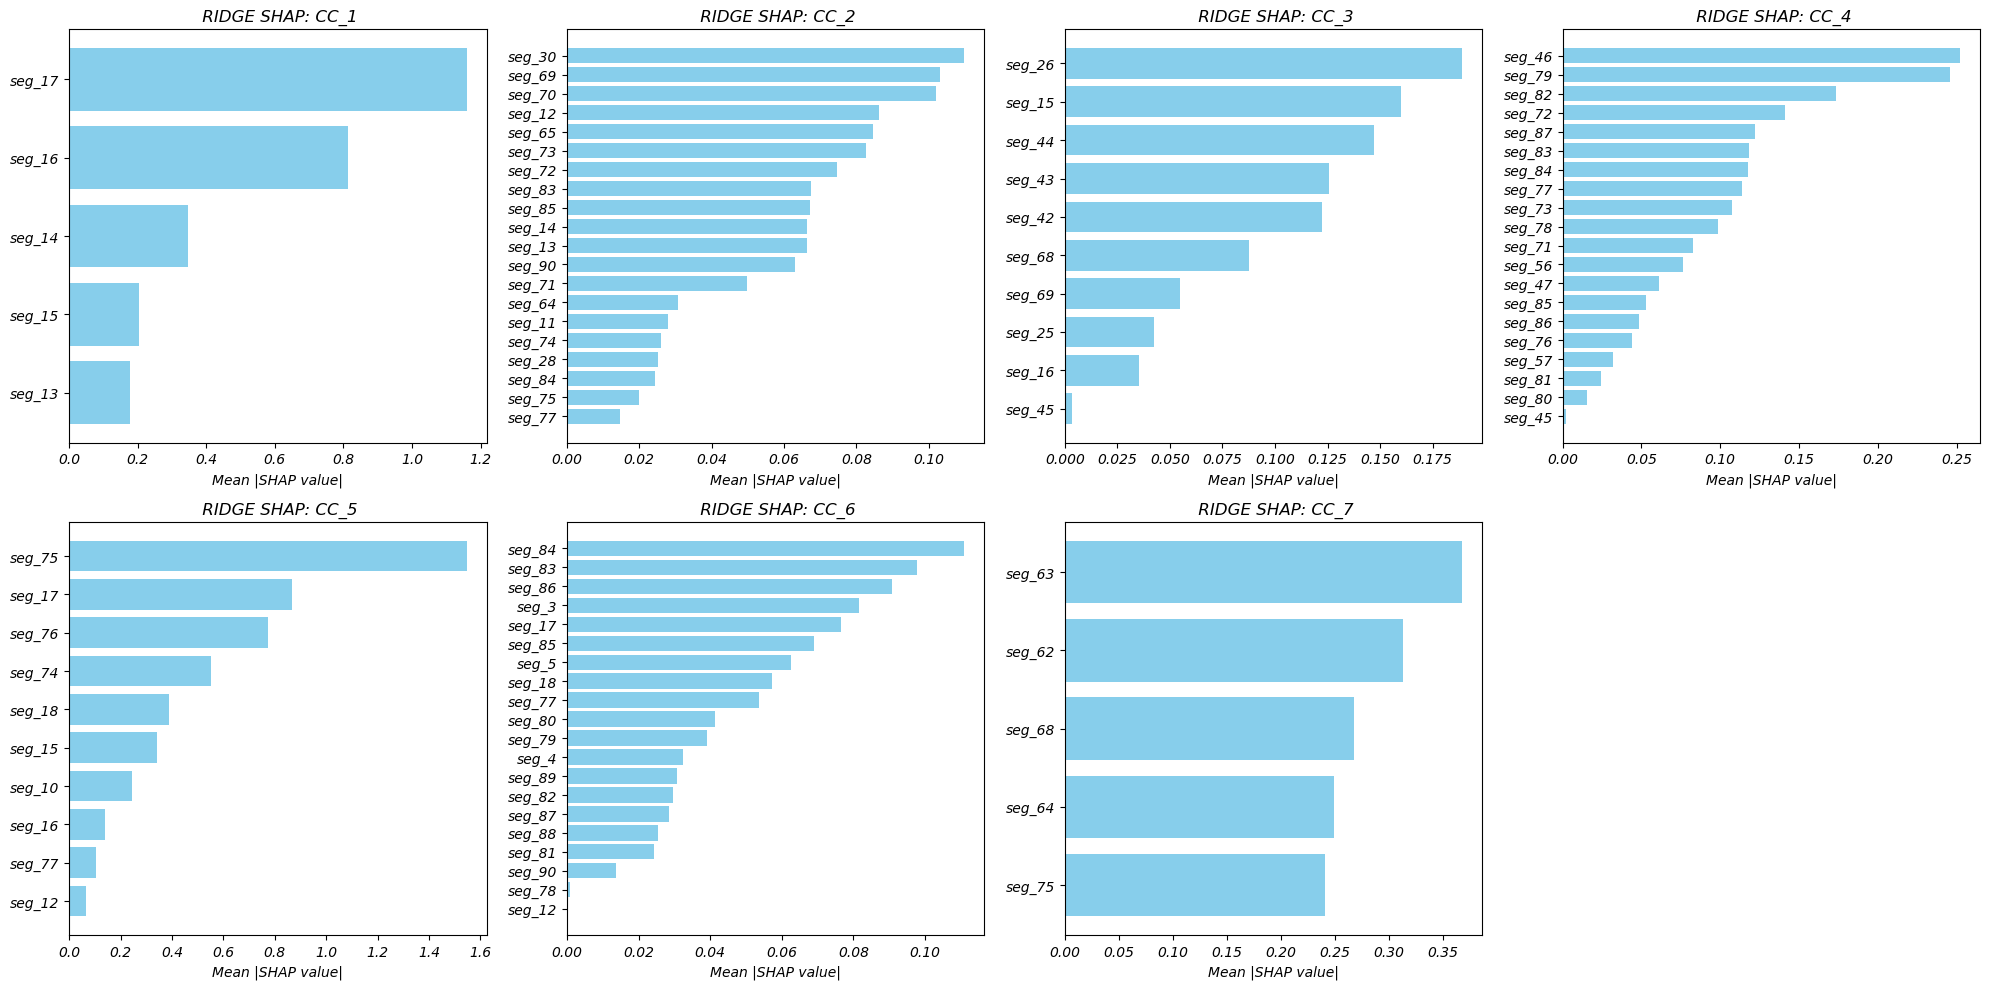

In [49]:

all_shap_df = compute_and_plot_shap(
    CCx_list=CCx_list,
    CC_path=CC_path,
    all_best_model=all_best_ridge,
    selected_features_model=selected_features_ridge,
    sub_id_df=sub_id_df,
    model_name='RIDGE',
    exclude_cols=exclude_cols,
    target_col="age"
)


In [50]:

def plot_fa_profiles(CCx_list, CC_path, selected_features_model, model_name="RIDGE", exclude_cols=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    import os

    """
    Plot mean FA profiles across CC regions with selected non-zero features highlighted.
    
    Parameters
    ----------
    CCx_list : list of str -  List of CC region names (e.g., ["CC1", "CC2", ...]).
    CC_path : str -      Path to directory containing CC FA CSVs.
    all_coefs : dict -    Dictionary mapping CCx -> DataFrame with 'Feature' and 'Coefficient' columns.
    selected_features_model,  
    model_name : str, default="RIDGE" -      Name of the model (used in plot titles).
    exclude_cols : list of str, optional
    """
    
    if exclude_cols is None:
        exclude_cols = ['NEW_SUB', 'age','Index','group', 
                        'group_M', 'group_O', 'group_Y', 'sex_F', 'sex_M']
    
    # Preload all CSVs
    all_CCs = {
        CCx: pd.read_csv(os.path.join(CC_path, f"{CCx}_FA.csv"), sep=",") 
        for CCx in CCx_list
    }

    # Create figure with 2 rows x 4 columns (handles up to 8 CC regions)
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    axs = axs.flatten()

    for i, CCx in enumerate(CCx_list):
        dfCCx = all_CCs[CCx].drop(columns=exclude_cols, errors="ignore")

        # X-axis = nodes (1-based)
        x = range(1, dfCCx.shape[1] + 1)

        # Mean FA across subjects
        y = dfCCx.mean(axis=0).values  

        # ---- Plot mean FA curve ----
        axs[i].plot(x, y, color='blue', label="Mean FA")

        # ---- Highlight selected non-zero features ----
        #coef_df = all_coefs[CCx]  # stored earlier
        #nonzero_feats = coef_df.loc[coef_df["Coefficient"] != 0, "Feature"].tolist()

        # Alll selected  features -----
        selected_feats = selected_features_model[CCx]
        valid_feats = [f for f in selected_feats if f in dfCCx.columns]

        # Get column indices for these features
        important_indices = [dfCCx.columns.get_loc(f) for f in valid_feats]
        important_values = y[important_indices]

        # Scatter plot highlights
        axs[i].scatter(
            [idx + 1 for idx in important_indices],  # convert to 1-based indexing
            important_values,
            color='red', marker='X', s=100,
            label=f"{model_name}-selected"
        )

        axs[i].set_title(f"{CCx}")
        axs[i].set_xlabel("Segment ID")
        axs[i].set_ylabel("FA Value")
        axs[i].legend()

    # Remove unused subplots if < 8 CCs
    for j in range(len(CCx_list), len(axs)):
        axs[j].axis("off")

    plt.suptitle(f"{model_name} Regression: Selected Features Highlighted on FA Profiles", fontsize=16)
    plt.tight_layout()
    plt.show()


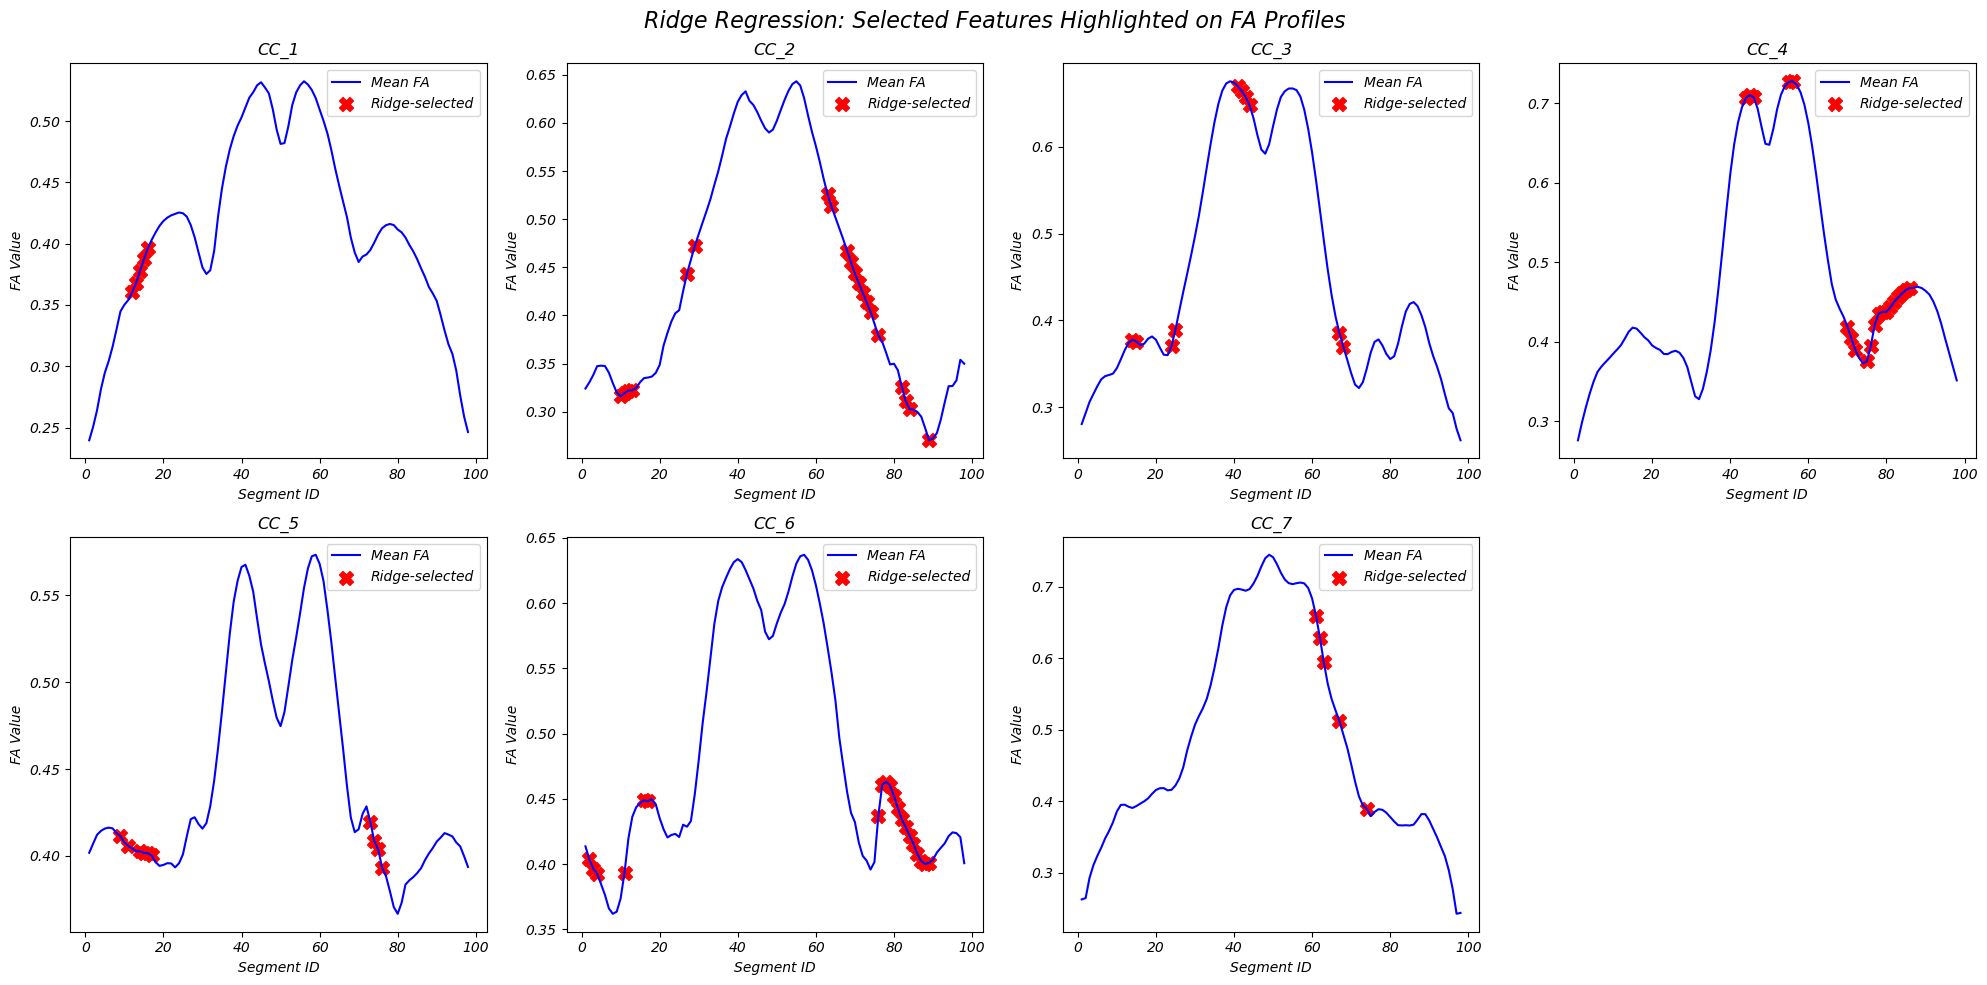

In [51]:
plot_fa_profiles(CCx_list, CC_path, selected_features_ridge, model_name="Ridge")


### Classification Analysis 

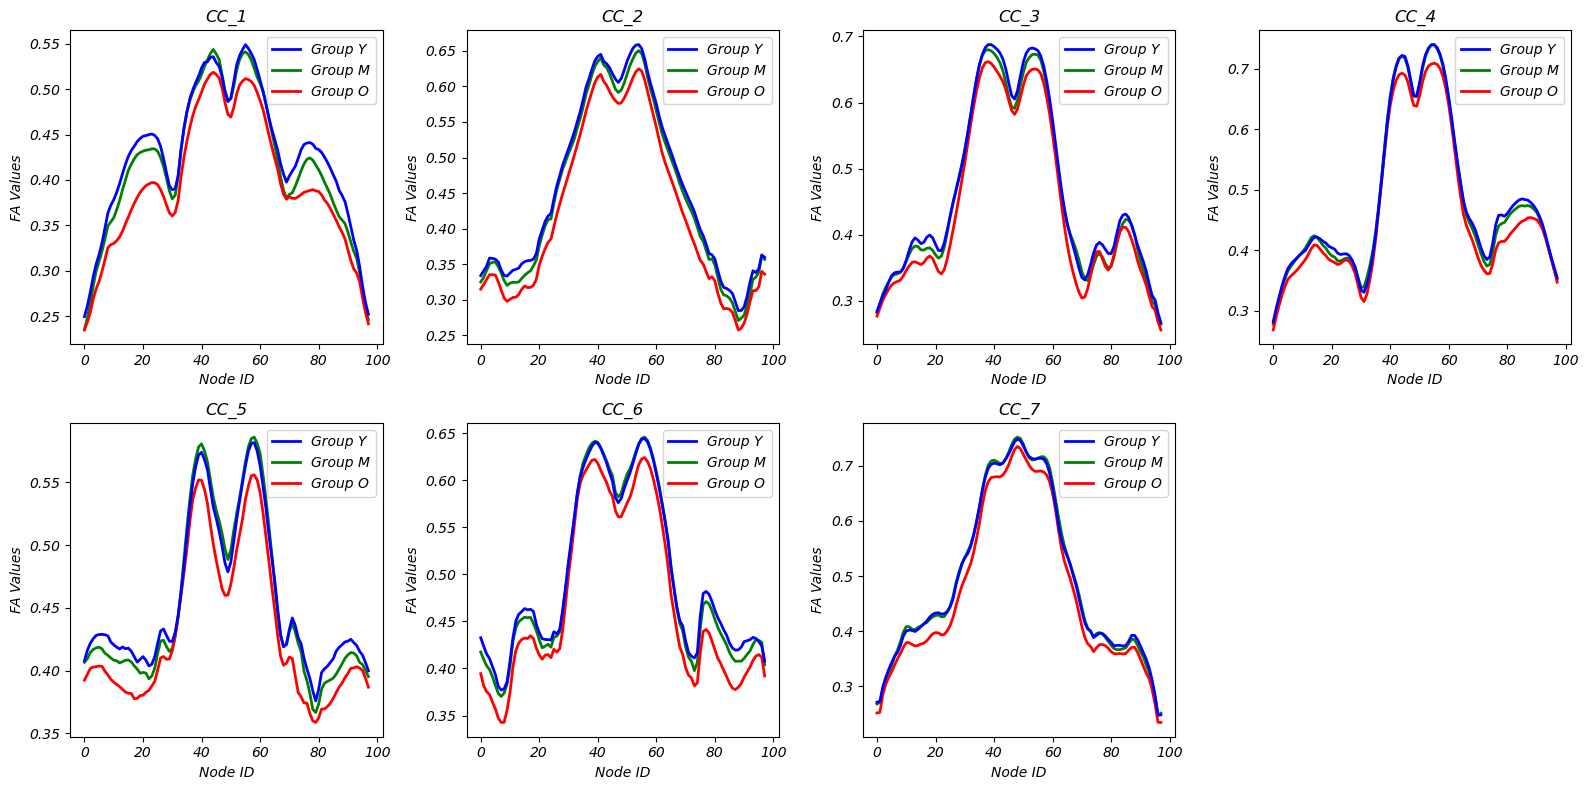

In [52]:
# Paths and CC list
CC_path = '/home/daniela/Documents/PROJECTS/DESU_Data_Science/PROJECT_DTI_AGE/Notebook'
CCx_list = ['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']

# Color mapping for groups
group_colors = {'Y': 'blue', 'M': 'green', 'O': 'red'}
# Create subplots (2x4 grid for 7 plots)
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axs = axs.flatten()

all_CCs = {CCx: pd.read_csv(os.path.join(CC_path, f"{CCx}_FA.csv"), sep=",") for CCx in CCx_list}


for i, CCx in enumerate(CCx_list):
    dfCCx = all_CCs[CCx]
    # Keep only numeric columns
    dfCCx_numeric = dfCCx.drop(columns=exclude_cols, errors='ignore')
    # X-axis: nodes
    x = range(len(dfCCx_numeric.columns))   
    # get the mean of FA values, per group
    mean_values = dfCCx_numeric.copy()
    mean_values['group'] = dfCCx['group']
    mean_values = mean_values.groupby('group').mean()
    for group, row in mean_values.iterrows():
        color = group_colors.get(group, 'gray')
        axs[i].plot(x, row.values, color=color, label=f'Group {group}', linewidth=2)
        
    # Plot each row as a line, colored by group
    #for idx, row in dfCCx_numeric.iterrows():
    #    group = dfCCx.loc[idx, 'group']   # safer than iloc
    #    color = group_colors.get(group, 'gray')
    #    axs[i].plot(x, row.values, color=color, alpha=0.3)  
    axs[i].set_title(f'{CCx}')
    axs[i].set_xlabel('Node ID')
    axs[i].set_ylabel('FA Values')  
    
    # Legend once per subplot (use custom handles)
    handles = [plt.Line2D([0], [0], color=c, lw=2, label=f'Group {g}') 
               for g, c in group_colors.items()]
    axs[i].legend(handles=handles, loc='upper right')

# Remove extra subplot (8th slot)
if len(CCx_list) < len(axs):
    for j in range(len(CCx_list), len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


### Pipeline
- RobustScaler
- Feature selection
- classification model 

In [87]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # C-Support Vector Classification.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


exclude_cols = ['NEW_SUB', 'Index','group', 'group_M', 'group_O', 'group_Y', 'sex_F', 'sex_M']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# storing results
results_all = {}   # store results for each CCx and each model
all_knn_selected_features = {}  
all_logreg_selected_features = {}  
all_svm_selected_features = {}  


CCx_list = ['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']

for CCx in CCx_list:
    file_path = os.path.join(CC_path, f'{CCx}_FA.csv')
    dfCCx = pd.read_csv(file_path)

    # Features
    X = dfCCx.drop(columns='age', errors="ignore")
    X = X.drop(columns=[c for c in exclude_cols if c in X.columns], errors="ignore")

    # Target
    y = sub_id_df['group'].dropna()
    X = X.loc[y.index].reset_index(drop=True)
    y = y.reset_index(drop=True)

    # Dictionary to store model results for this CCx
    results_all[CCx] = {}

    # =====================================================
    # 1) KNN PIPELINE
    # =====================================================
    pipe_knn = Pipeline([
        ('scaler', RobustScaler()),
        ('feature_selection','passthrough'),
        ('clf', KNeighborsClassifier())
    ])

    param_grid_knn = [
        {
            'feature_selection': [SelectKBest(score_func=f_classif)],
            'feature_selection__k': [5, 10, 15, 20],
            'clf__n_neighbors': [3, 5],
            'clf__weights': ['uniform', 'distance'],
            'clf__p': [1, 2]
        }
    ]

    grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=cv,
                            scoring='f1_macro', n_jobs=-1, verbose=1)
    grid_knn.fit(X, y)

    results_all[CCx]["KNN"] = {
        "best_model": grid_knn.best_estimator_,
        "best_params": grid_knn.best_params_,
        "best_score": grid_knn.best_score_,
        "y_pred": grid_knn.predict(X),
        "cm": confusion_matrix(y, grid_knn.predict(X))
    }

    # =====================================================
    # 2) LOGISTIC REGRESSION PIPELINE
    # =====================================================
    pipe_logreg = Pipeline([
        ('scaler', RobustScaler()),
        ('feature_selection', 'passthrough'),
        ('clf', LogisticRegression(max_iter=5000, class_weight='balanced'))
    ])

    param_grid_logreg = [
        {
            'feature_selection': [SelectKBest(score_func=f_classif)],
            'feature_selection__k': [5, 10, 15, 20],
            'clf__C':[0.01, 0.1, 10],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear', 'saga']
        }
    ]
    grid_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=cv,scoring='f1_macro', n_jobs=-1, verbose=1)
    grid_logreg.fit(X, y)

    results_all[CCx]["LogisticRegression"] = {
        "best_model": grid_logreg.best_estimator_,
        "best_params": grid_logreg.best_params_,
        "best_score": grid_logreg.best_score_,
        "y_pred": grid_logreg.predict(X),
        "cm": confusion_matrix(y, grid_logreg.predict(X))
    }

    # =====================================================
    # 3) SVM PIPELINE
    # =====================================================
    pipe_svm = Pipeline([
        ('scaler', RobustScaler()),
        ('feature_selection', 'passthrough'),
        ('clf', SVC(class_weight='balanced'))
    ])

    param_grid_svm = [
        {
            'feature_selection': [SelectKBest(score_func=f_classif)],
            'feature_selection__k': [5, 10, 15, 20],
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['linear', 'rbf'],
            'clf__gamma': ['scale', 'auto']
        }
    ]

    grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)

    grid_svm.fit(X, y)

    results_all[CCx]["SVM"] = {
        "best_model": grid_svm.best_estimator_,
        "best_params": grid_svm.best_params_,
        "best_score": grid_svm.best_score_,
        "y_pred": grid_svm.predict(X),
        "cm": confusion_matrix(y, grid_svm.predict(X))
    }

        
    # For KNN
    results_all[CCx]["KNN"]["classification_report"] = classification_report(y, results_all[CCx]["KNN"]["y_pred"])
    # For Logistic Regression
    results_all[CCx]["LogisticRegression"]["classification_report"] = classification_report(y, results_all[CCx]["LogisticRegression"]["y_pred"])
    # For SVM
    results_all[CCx]["SVM"]["classification_report"] = classification_report(y, results_all[CCx]["SVM"]["y_pred"])

    # =====================================================
    #  Summary of the results for each CCx 
    print(f"\n===== {CCx} RESULTS =====")
    for model_name, res in results_all[CCx].items():
        print(f"\n{model_name}")
        print("Best params:", res["best_params"])
        print("Best CV score (f1_macro):", res["best_score"])
        print("Confusion Matrix:\n", res["cm"])
        print("Classification Report:\n", res["classification_report"])
    
    #------------------------------------
    # Compare models
    print("--------- Comparing the models ---------------")
    print(f" {CCx}  RESULTS: ")
    if grid_knn.best_score_ > grid_logreg.best_score_ and grid_knn.best_score_ > grid_svm.best_score_ :
        print(" -->  KNN performs better on CV (f1_macro).")
    elif grid_logreg.best_score_ > grid_knn.best_score_ and grid_logreg.best_score_ > grid_svm.best_score_ :
       print(" -->  Logistic regression model performs better on CV (f1_macro).")
    else:
        print(" --> SVM performs better on CV (f1_macro)")
    print("---------------------------------------------")

    # -------------------------------
    # Getting the selected features
    # ----------------------------------
    # For KNN
    knn_scores = results_all[CCx]["KNN"]["best_model"].named_steps['feature_selection'].scores_
    knn_pvalues = results_all[CCx]["KNN"]["best_model"].named_steps['feature_selection'].pvalues_
    knn_selected_features = X.columns[results_all[CCx]["KNN"]["best_model"].named_steps['feature_selection'].get_support()]
    all_knn_selected_features[CCx] = knn_selected_features

    # For Logistic Regression
    logreg_scores = results_all[CCx]["LogisticRegression"]["best_model"].named_steps['feature_selection'].scores_
    logreg_pvalues = results_all[CCx]["LogisticRegression"]["best_model"].named_steps['feature_selection'].pvalues_
    logreg_selected_features = X.columns[results_all[CCx]["LogisticRegression"]["best_model"].named_steps['feature_selection'].get_support()]
    all_logreg_selected_features[CCx] = logreg_selected_features

    # For SVM
    svm_scores = results_all[CCx]["SVM"]["best_model"].named_steps['feature_selection'].scores_
    svm_pvalues = results_all[CCx]["SVM"]["best_model"].named_steps['feature_selection'].pvalues_
    svm_selected_features = X.columns[results_all[CCx]["SVM"]["best_model"].named_steps['feature_selection'].get_support()]
    all_svm_selected_features[CCx]  = svm_selected_features



Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits

===== CC_1 RESULTS =====

KNN
Best params: {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'distance', 'feature_selection': SelectKBest(), 'feature_selection__k': 10}
Best CV score (f1_macro): 0.6472871572871572
Confusion Matrix:
 [[20  0  0]
 [ 0 25  0]
 [ 0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           M       1.00      1.00      1.00        20
           O       1.00      1.00      1.00        25
           Y       1.00      1.00      1.00        21

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66


LogisticRegression
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'feature_selection': SelectKBest(), 'feature_selection__k': 5}
Best CV score (f1_macro): 0.6926791726791726
Confusion Matrix:
 [[ 9  4  7]
 [ 2 22  1]
 [ 2  2 17]]
C

/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits

===== CC_4 RESULTS =====

KNN
Best params: {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'distance', 'feature_selection': SelectKBest(), 'feature_selection__k': 5}
Best CV score (f1_macro): 0.6263828763828764
Confusion Matrix:
 [[20  0  0]
 [ 0 25  0]
 [ 0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           M       1.00      1.00      1.00        20
           O       1.00      1.00      1.00        25
           Y       1.00      1.00      1.00        21

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66


LogisticRegression
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'feature_selection': SelectKBest(), 'feature_selection__k': 5}
Best CV score (f1_macro): 0.5373015873015873
Confusion Matrix:
 [[ 6  8  6]
 [ 5 17  3]
 [ 6  2 13]]
Cl

In [88]:
for CCx in CCx_list:
    print(f"\n===== {CCx} FEATURE IMPORTANCE =====")

    # KNN
    knn_selected_features = X.columns[results_all[CCx]["KNN"]["best_model"].named_steps['feature_selection'].get_support()]
    knn_scores = results_all[CCx]["KNN"]["best_model"].named_steps['feature_selection'].scores_
    print("\nKNN Selected Features and Scores:")
    for feature, score in zip(knn_selected_features, knn_scores[results_all[CCx]["KNN"]["best_model"].named_steps['feature_selection'].get_support()]):
        print(f"{feature}: {score:.2f}")

    # Logistic Regression
    logreg_selected_features = X.columns[results_all[CCx]["LogisticRegression"]["best_model"].named_steps['feature_selection'].get_support()]
    logreg_scores = results_all[CCx]["LogisticRegression"]["best_model"].named_steps['feature_selection'].scores_
    print("\nLogistic Regression Selected Features and Scores:")
    for feature, score in zip(logreg_selected_features, logreg_scores[results_all[CCx]["LogisticRegression"]["best_model"].named_steps['feature_selection'].get_support()]):
        print(f"{feature}: {score:.2f}")

    # SVM
    svm_selected_features = X.columns[results_all[CCx]["SVM"]["best_model"].named_steps['feature_selection'].get_support()]
    svm_scores = results_all[CCx]["SVM"]["best_model"].named_steps['feature_selection'].scores_
    print("\nSVM Selected Features and Scores:")
    for feature, score in zip(svm_selected_features, svm_scores[results_all[CCx]["SVM"]["best_model"].named_steps['feature_selection'].get_support()]):
        print(f"{feature}: {score:.2f}")



===== CC_1 FEATURE IMPORTANCE =====

KNN Selected Features and Scores:
seg_12: 24.18
seg_13: 26.84
seg_14: 29.93
seg_15: 31.33
seg_16: 29.90
seg_17: 28.30
seg_18: 24.46
seg_19: 20.30
seg_37: 19.56
seg_38: 20.33

Logistic Regression Selected Features and Scores:
seg_13: 26.84
seg_14: 29.93
seg_15: 31.33
seg_16: 29.90
seg_17: 28.30

SVM Selected Features and Scores:
seg_13: 26.84
seg_14: 29.93
seg_15: 31.33
seg_16: 29.90
seg_17: 28.30

===== CC_2 FEATURE IMPORTANCE =====

KNN Selected Features and Scores:
seg_11: 27.16
seg_12: 28.08
seg_13: 29.66
seg_14: 32.16
seg_71: 26.00
seg_72: 25.23
seg_83: 25.41
seg_84: 29.49
seg_85: 29.68
seg_86: 26.02

Logistic Regression Selected Features and Scores:
seg_11: 27.16
seg_12: 28.08
seg_13: 29.66
seg_14: 32.16
seg_15: 24.57
seg_30: 25.00
seg_69: 24.43
seg_70: 24.51
seg_71: 26.00
seg_72: 25.23
seg_74: 24.74
seg_83: 25.41
seg_84: 29.49
seg_85: 29.68
seg_86: 26.02

SVM Selected Features and Scores:
seg_10: 23.74
seg_11: 27.16
seg_12: 28.08
seg_13: 29.6

In [96]:
results_all['CC_6']["SVM"]["best_model"]

Pipeline(steps=[('scaler', RobustScaler()),
                ('feature_selection', SelectKBest()),
                ('clf', SVC(C=10, class_weight='balanced', gamma='auto'))])

## Interppretation

#### Learning curve

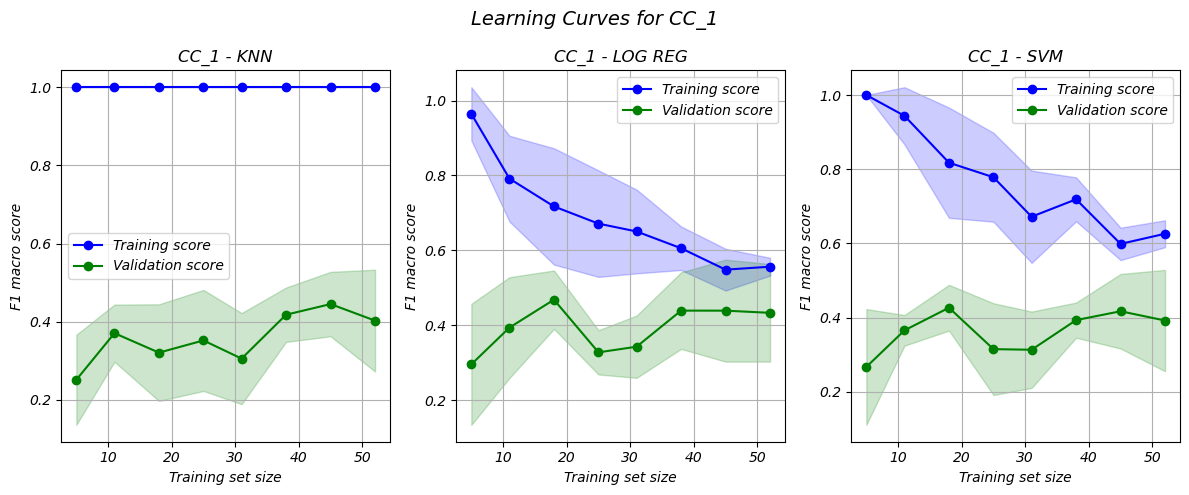

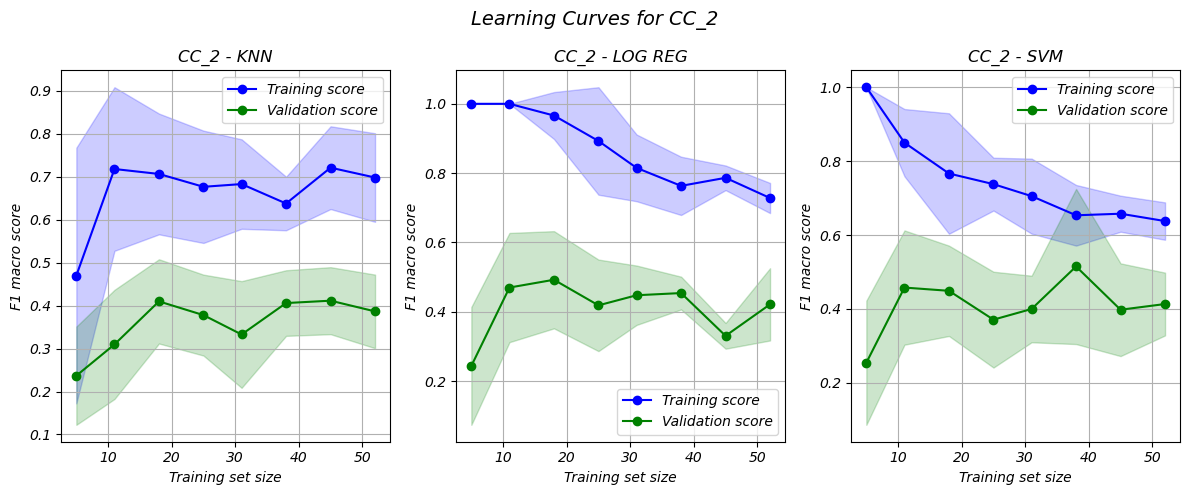

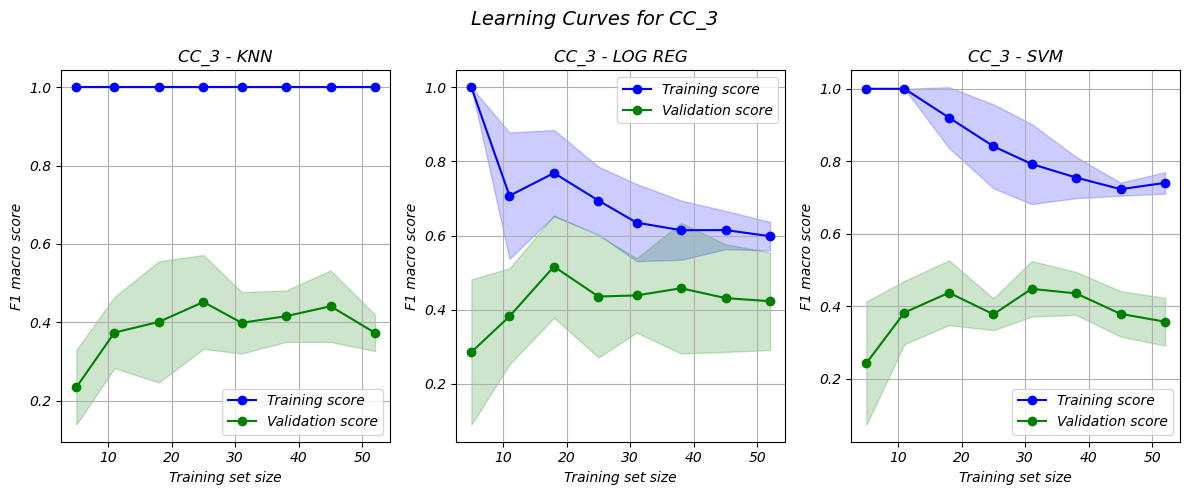

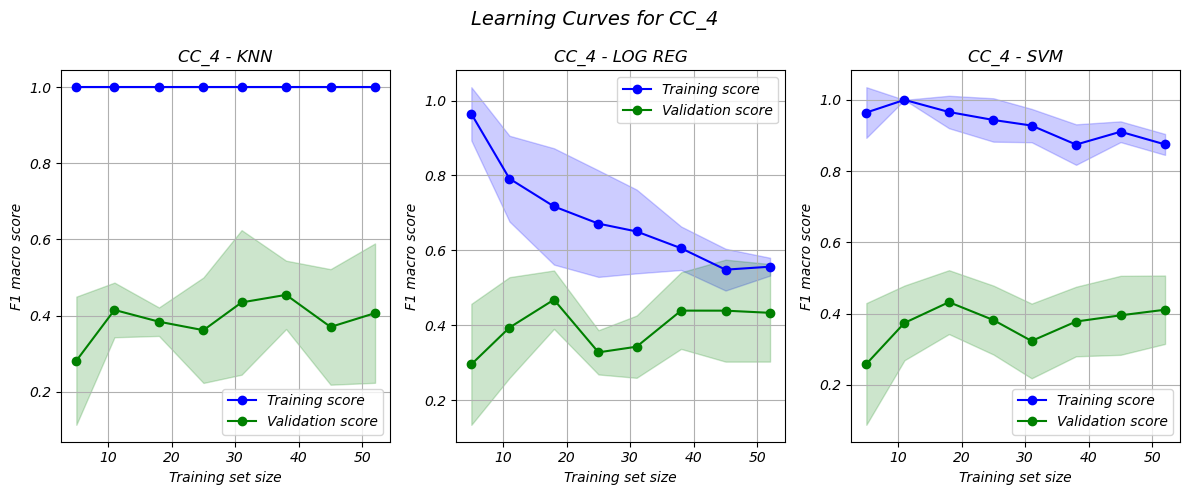

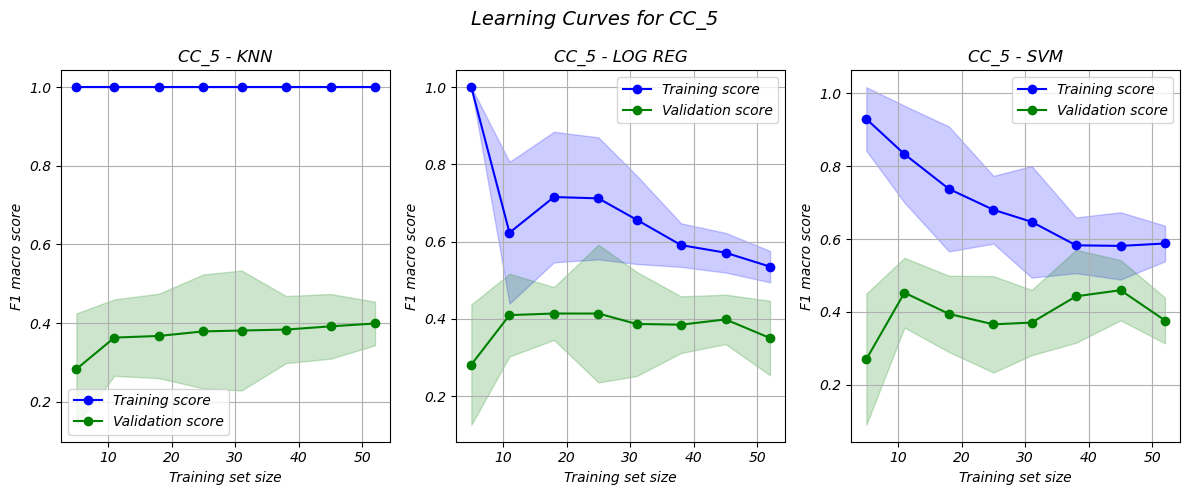

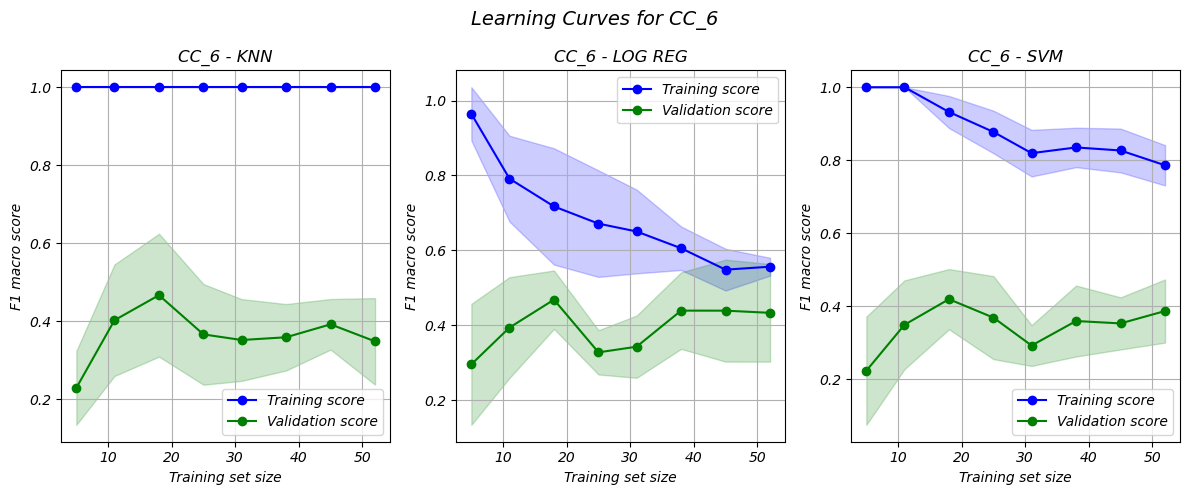

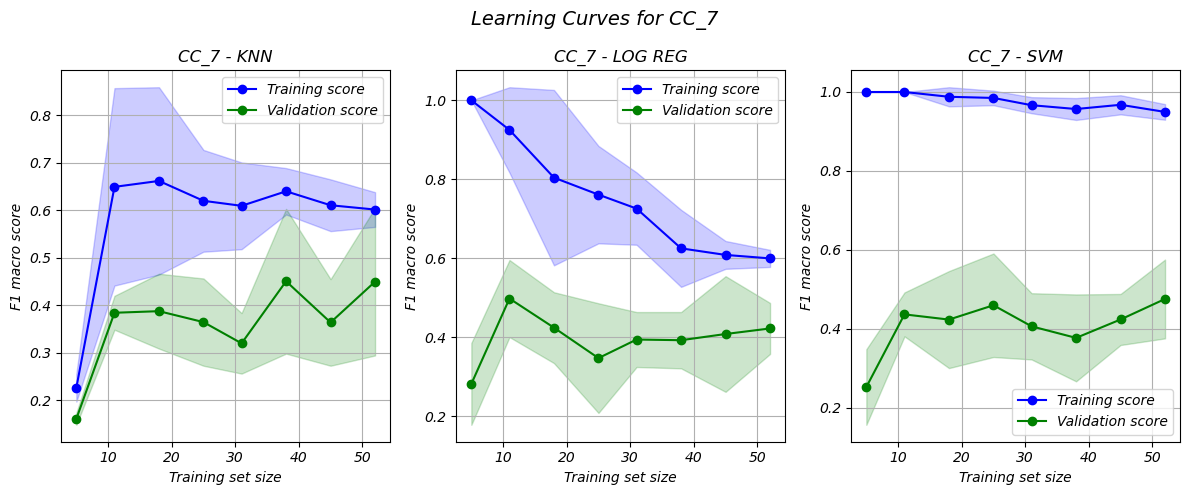

Exception ignored in: <function ResourceTracker.__del__ at 0x757ab809f2e0>
Traceback (most recent call last):
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x78fe68c9f2e0>
Traceback (most recent call last):
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/daniela/anaconda3/envs/demo_desu/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
Chi

In [89]:
def plot_Classif_learning_curve(estimator, X, y, cv, title):
    """
    Plots learning curve for a given estimator and dataset.

    Parameters:
    - estimator : any sklearn estimator (pipeline, regressor, etc.)
    - X : feature matrix
    - y : target vector
    - cv : cross-validation strategy
    - title : plot title
    """
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, val_scores = learning_curve(
        estimator,
        X, y,
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 8),
        shuffle=True,
        random_state=42
    )
    
    train_mean, train_std = train_scores.mean(axis=1), train_scores.std(axis=1)
    val_mean, val_std = val_scores.mean(axis=1), val_scores.std(axis=1)
    # training 1
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")
    # valiadation 2
    plt.plot(train_sizes, val_mean, 'o-', color="green", label="Validation score")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="green")

    plt.title(title)
    plt.xlabel("Training set size")
    plt.ylabel("F1 macro score")
    plt.legend(loc="best")
    plt.grid(True)


# Use of the function
for CCx in CCx_list:

    # KNN
    best_knn= results_all[CCx]["KNN"]["best_model"]

     # logistic regression
    best_logreg= results_all[CCx]["LogisticRegression"]["best_model"]

     # SVM
    best_svm= results_all[CCx]["SVM"]["best_model"]


    
    # Plot learning curves side by side
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    plot_Classif_learning_curve(best_knn, X, y, cv=cv, title=f"{CCx} - KNN")
    plt.subplot(1,3,2)
    plot_Classif_learning_curve(best_logreg, X, y, cv=cv, title=f"{CCx} - LOG REG")
    plt.subplot(1,3,3)
    plot_Classif_learning_curve(best_svm, X, y, cv=cv, title=f"{CCx} - SVM")
    plt.suptitle(f"Learning Curves for {CCx}", fontsize=14)
    plt.tight_layout()
    plt.show()


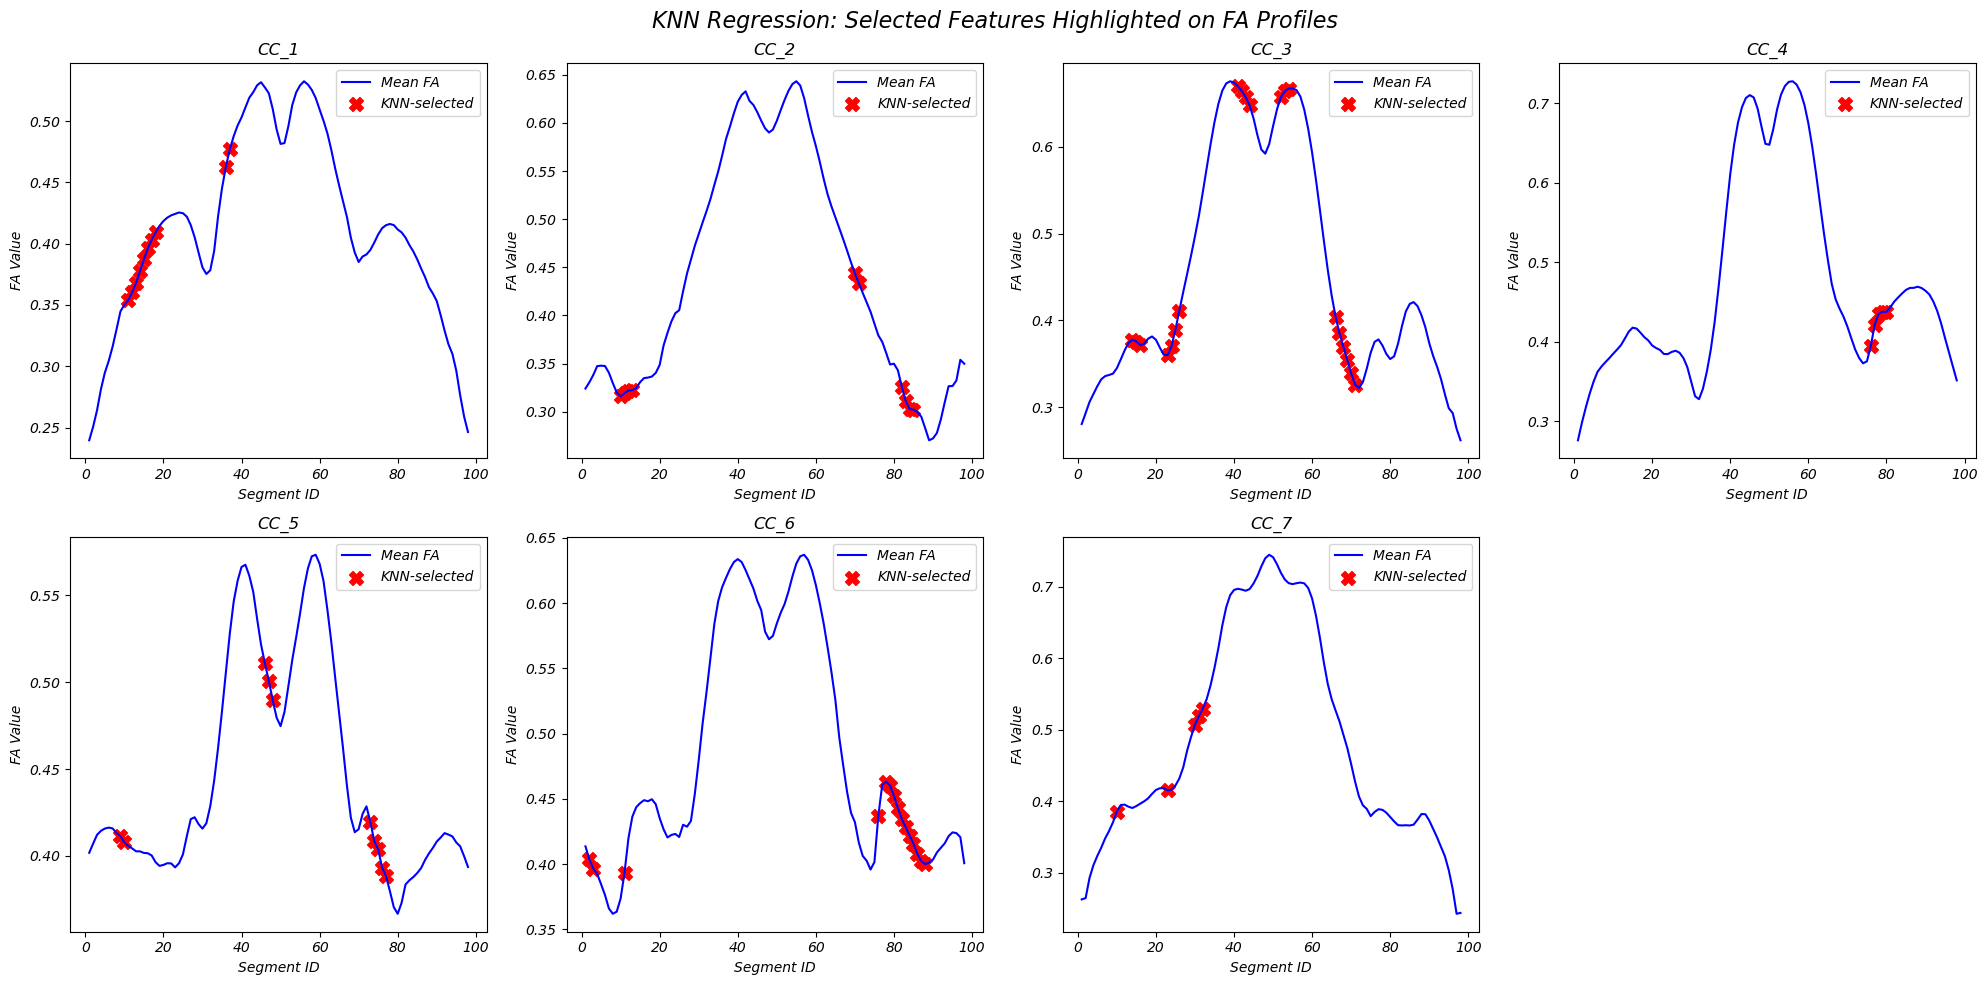

In [56]:
plot_fa_profiles(CCx_list, CC_path, all_knn_selected_features, model_name="KNN")

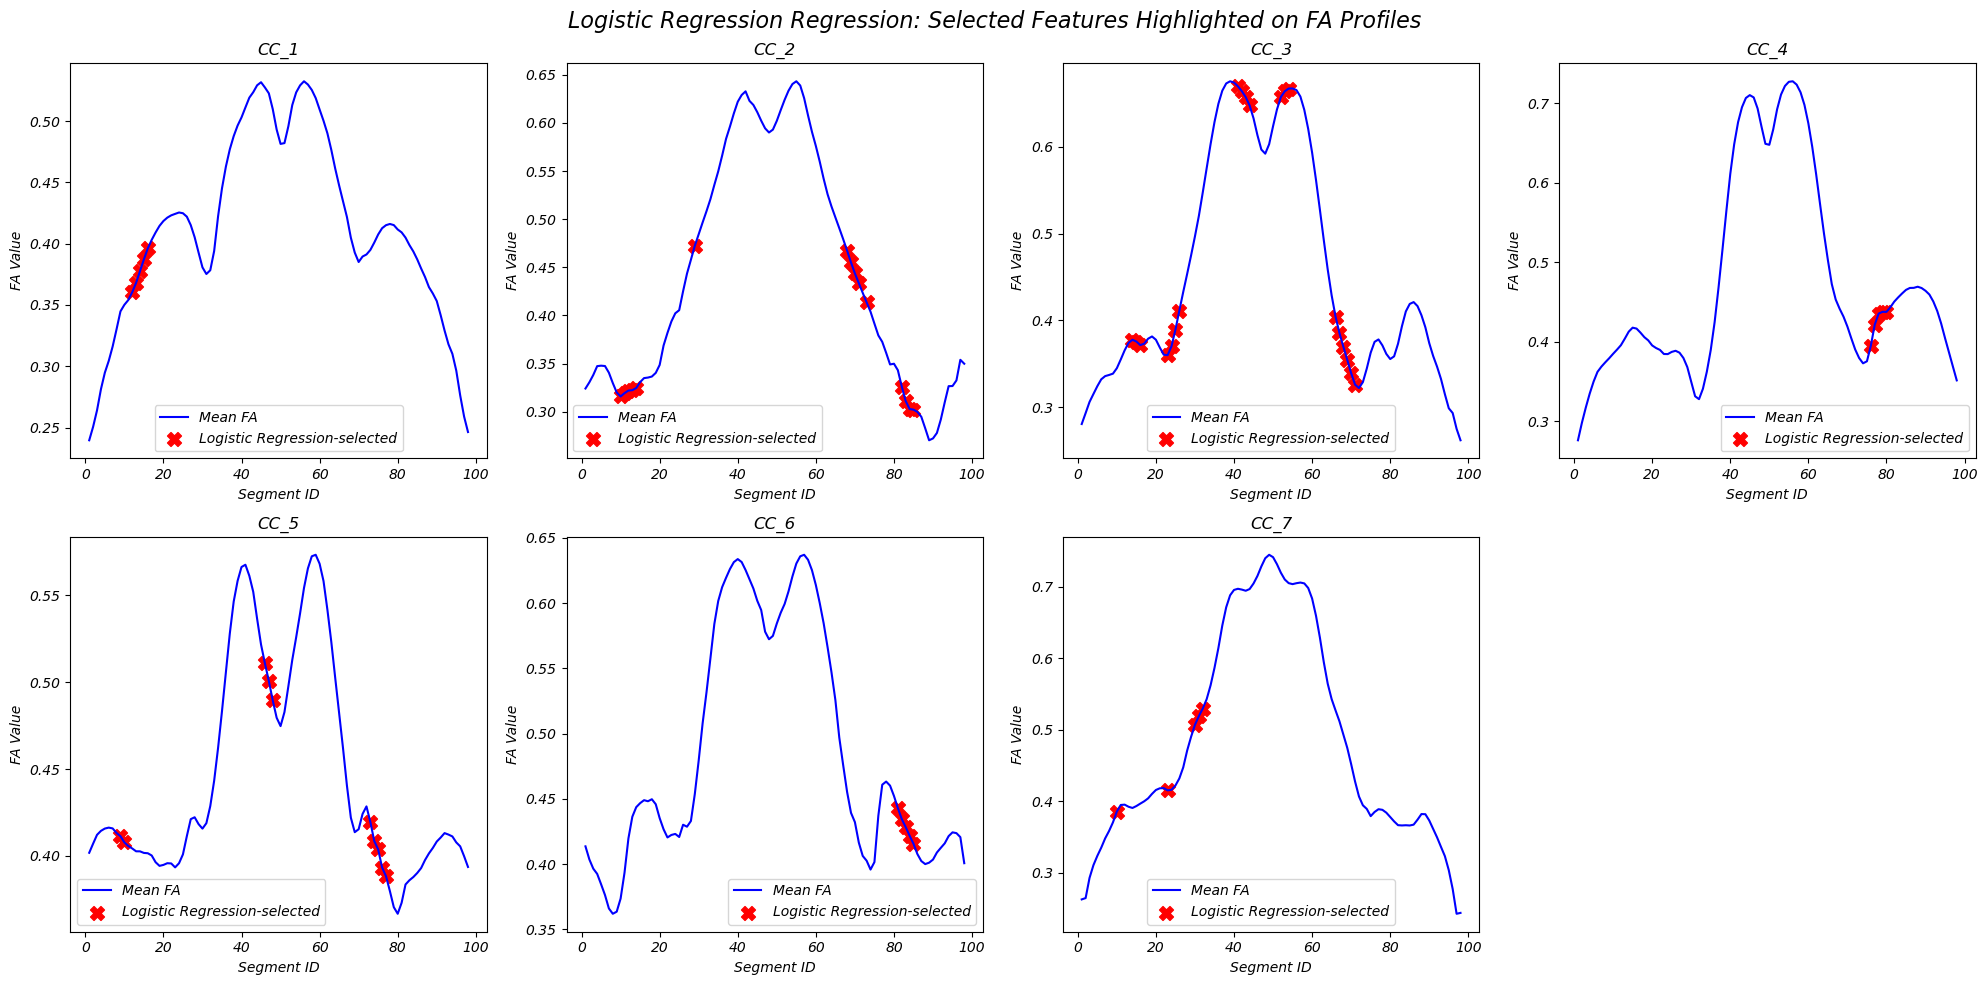

In [57]:
plot_fa_profiles(CCx_list, CC_path, all_logreg_selected_features, model_name="Logistic Regression")

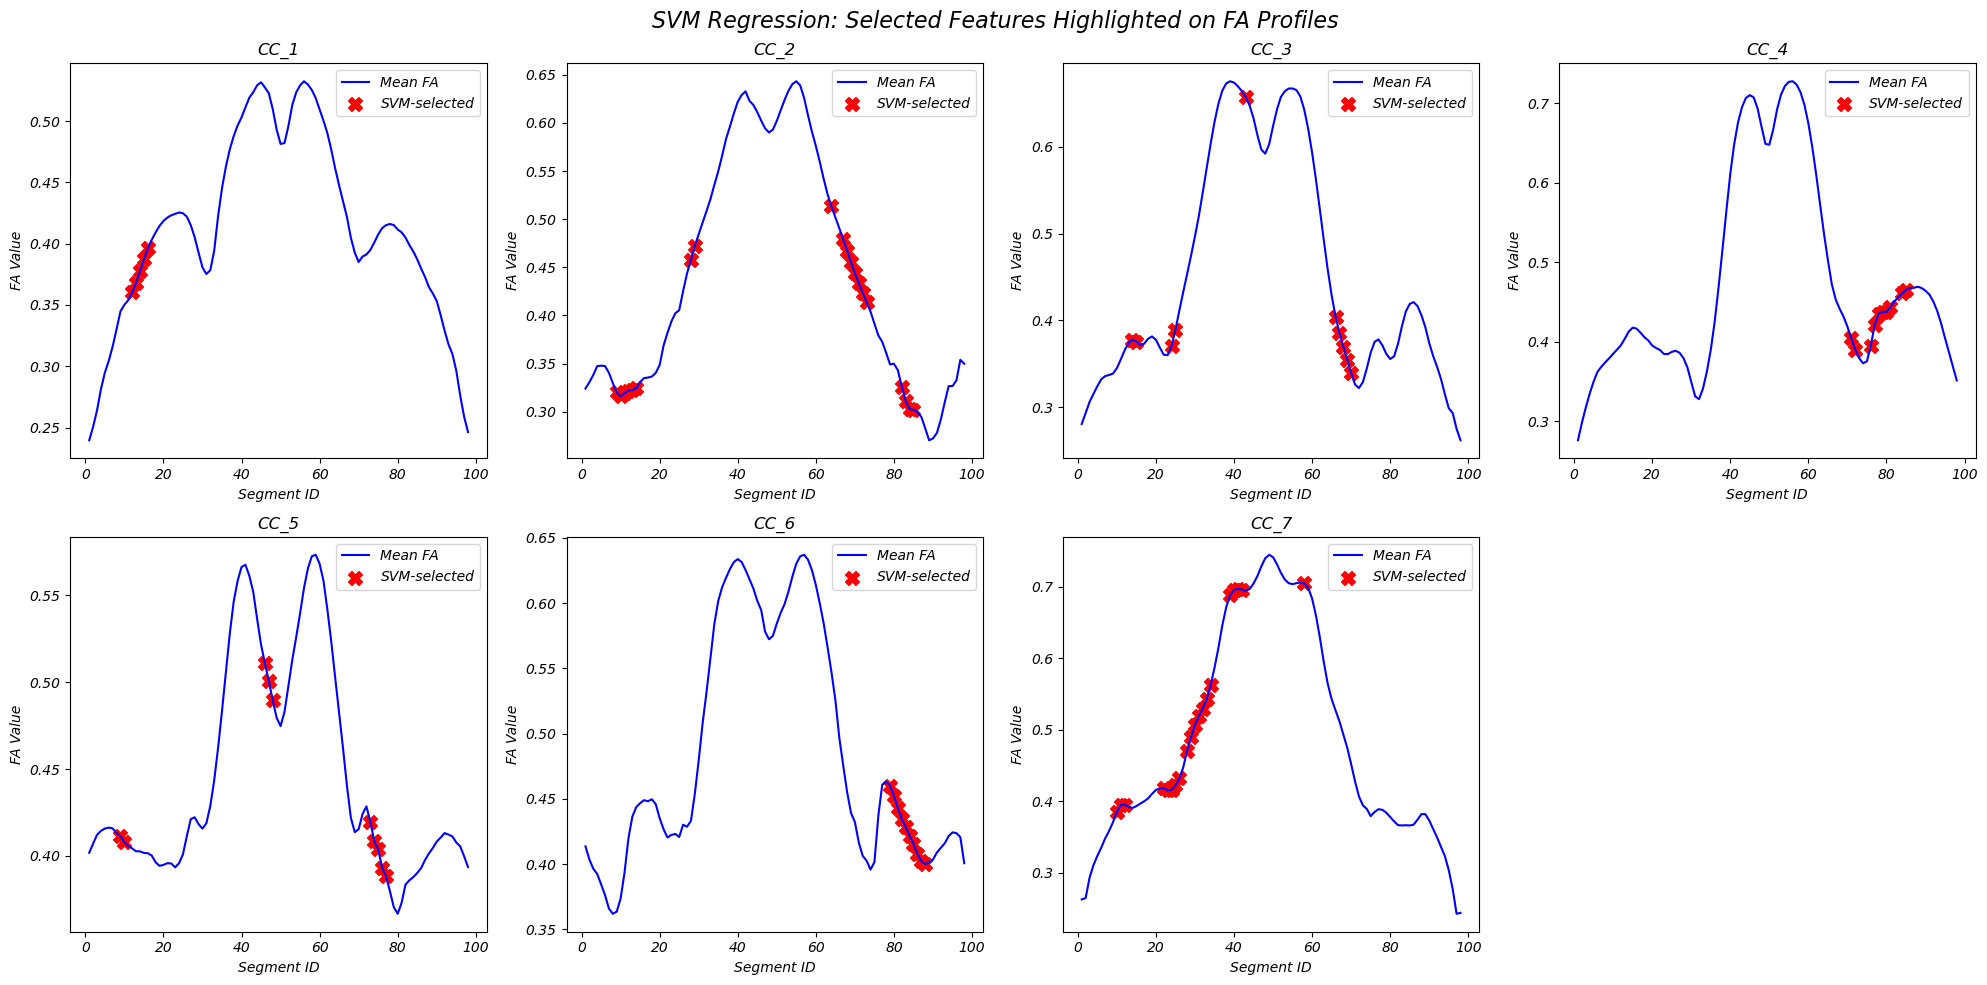

In [58]:
plot_fa_profiles(CCx_list, CC_path, all_svm_selected_features, model_name="SVM")